# ***Bank Marketing Analysis***

Este conjunto de dados diz respeito a campanhas de marketing direto (Chamadas Telefónicas) de uma instituição bancária Portuguesa.

O objetivo da segmentação é prever se um cliente irá subscrever um depósito a prazo (Variável Y) -> o nosso target. Vamos também utilizar a aprendizagem não supervisionada para agrupar o nosso target, e tentar dividir os clientes que depositaram e os que não.

In [1]:
import pandas as pd

bank = pd.read_csv('bank-full.csv', header=0, sep=';')
bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


# ***Exploratory Data Analysis (EDA) & Pre-Processing***

Para começar o projeto, fazemos primeiro uma análise inicial (EDA), para perceber como é que os dados estão distribuidos e tentar ver a existência de outliers, dados omissos e dados duplicados. Esta fase é importante, pois o modelo de previsão e de agrupamentos, tem de ter o melhor que os dados podem fornecer para terem uma boa aprendizagem e bons resultados.

In [2]:
bank.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

Para começar, utilizamos a função **dtypes**, para ver se os dados estão no tipo certo.

Caso não estejam, no passo seguinte iremos trocar o tipo da(s) variável(is) em questão.

In [3]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


Neste passo, utilizamos a função **info()**, para ter acesso á informação dos dados mais específica.

Aqui reparamos que os nossos dados, não contém valores omissos. Para ter a certeza desta informação, iremos usar as funções **isna()** e **sum()** para vermos a existência de valores omissos.

In [4]:
bank.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

A partir do output, reparamos que não existem valores omissos. Portanto não temos de nos preocupar em removê-los ou até mesmo substituir (para não perdermos informação).

In [5]:
bank.duplicated().sum()

0

Aqui reparamos que temos 17 linhas duplicadas, como são bastante poucas linhas, podemos simplesmente removê-las do nosso dataset.

In [6]:
bank = bank.drop_duplicates()

In [7]:
bank.duplicated().sum()

0

Como podemos ver, as linhas duplicadas foram removidas com sucesso.

In [8]:
count_no = 0

for value in bank['default']:
    if value == 'no':
        count_no += 1

print("Number of 'no' occurences in the 'default' column: ", count_no)
print("Number of rows in 'defalut' column: ", len(bank['default']))

Number of 'no' occurences in the 'default' column:  44396
Number of rows in 'defalut' column:  45211


Usamos este código, pois na criação do Dataset, reparamos que a coluna default parecia só entregar valores 'no', então verificamos se essa coluna inteira não entregava apenas esse valor.

Caso a coluna entregasse apenas o valor 'no', poderiamos remover essa coluna do dataset, dado que não transmitia nenhuma vantagem em tê-la.

Como também a coluna tem muito poucos valores 'yes' vamos analisar melhor se essa coluna deve ou não se manter no dataset. Como vimos inicialmente ao carregar os dados, no site *'UCI Machine Learning Repository'*, vemos que a variabilidade da colunas é muito baixa, dado que esta apresenta apenas dois valores 'yes' / 'no'.

In [9]:
percentage_no = count_no / len(bank['default'])
print("Proportion of 'no' in 'default' column: ", percentage_no)

Proportion of 'no' in 'default' column:  0.9819734135497998


Apesar disso esta coluna é importante para a aprendizagem, dado que nos mostra as pessoas que têm crédito em atraso, o que pode ser essencial para a aprendizagem mais tarde.

Como podemos ver, 'default' já não está presente no dataset.

## *Missing Values (Unknown)*

Após uma análise mais detalhada no site *UCI Machine Learning Repositpory*, onde retiramos o dataset, reparamos que existem colunas com missing values.

Anteriormente, usamos a função **isna()**, e deu-nos a informação que não existia missing values. Isto é porque, neste dataset os missing values não estão de maneira normal como *Na*, mas sim como *unknown*.

Reparamos também que na variável *poutcome*, o suposto é ter valores 'success', 'failure' e 'nonexistence', no entanto, esta variável toma os valores de 'success', 'failure', 'unknown', 'other'. Sendo que já percebemos que 'unknown' são os nossos valores omissos, então o valor 'other' tem de ser passado para 'nonexistence' 

Iremos começar por tratar dos valores omissos das variáveis. 

Como não estamos a tratar de valores omissos normais (Nas) mas sim de 'unknown' e no site onde descarregamos os dados já nos informa quais são as colunas que tinha este tipo de valores omissos, vamos fazer uma coluna de cada vez, para as colunas que existem.

In [10]:
count_unknown_contact = 0

for value in bank['contact']:
    if value == 'unknown':
        count_unknown_contact += 1

proportion = count_unknown_contact / len(bank)

print("Number of 'unknown' occurences in the 'contact' column: ", count_unknown_contact)
print("Number of rows: ", len(bank))
print("Proportion: ", proportion)

Number of 'unknown' occurences in the 'contact' column:  13020
Number of rows:  45211
Proportion:  0.28798301298356593


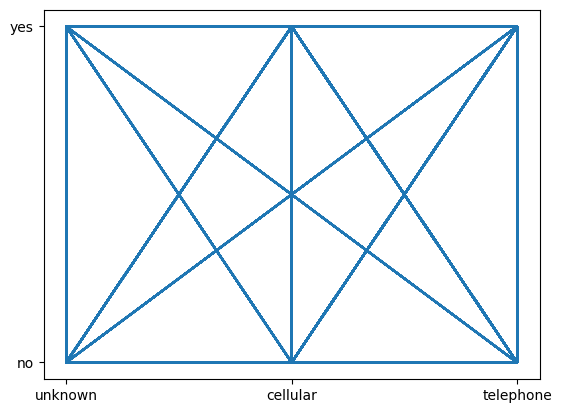

In [11]:
from matplotlib import pyplot as plt

plt.plot(bank['contact'], bank['y'])

Nesta plot vemos que os valores da variável 'contact', não influenciam o nosso target. Logo que como temos muitos valores 'unknown' (valores inexistentes), vamos remover a coluna, sendo que esta não vai determinar se o cliente vai depositar ou não.

In [12]:
bank = bank.drop(columns='contact')
bank

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,17,nov,508,4,-1,0,unknown,no


In [13]:
count_unknown_poutcome = 0

for value in bank['poutcome']:
    if value == 'unknown':
        count_unknown_poutcome +=1

proportion_poutcome = count_unknown_poutcome / len(bank)

print("Number of 'unknown' occurences in the 'poutcome' column: ", count_unknown_poutcome)
print("Number of rows: ", len(bank))
print("Proportion: ", proportion_poutcome)

Number of 'unknown' occurences in the 'poutcome' column:  36959
Number of rows:  45211
Proportion:  0.8174780473778506


Aqui vemos que 81% dos nossos dados são 'unknown' para a variável 'poutcome'. O que já é uma quantidade bastante elevada. Não é aconselhado remover os dados nesta coluna, sendo que perdemos demasiada informação, a alteração de dados também pode não ser aconselhado, sendo que ao alterarmos o valor desta variável, poderemos estar a criar informação falsa e a prejudicar o nosso modelo.

Apesar da nossa coluna ser importante para a aprendizagem mais tarde, temos de ter em conta á falta de informação que a coluna nos oferece. Se alterarmos os valores 'unknown' pela moda (valor mais frequente) da coluna, poderemos estar a fornecer informação falsa para a aprendizagem, e até mesmo fornecer noisy data e complexidade nos dados.

In [14]:
bank = bank.drop(columns='poutcome')
bank

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,y
0,58,management,married,tertiary,no,2143,yes,no,5,may,261,1,-1,0,no
1,44,technician,single,secondary,no,29,yes,no,5,may,151,1,-1,0,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,5,may,76,1,-1,0,no
3,47,blue-collar,married,unknown,no,1506,yes,no,5,may,92,1,-1,0,no
4,33,unknown,single,unknown,no,1,no,no,5,may,198,1,-1,0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,17,nov,977,3,-1,0,yes
45207,71,retired,divorced,primary,no,1729,no,no,17,nov,456,2,-1,0,yes
45208,72,retired,married,secondary,no,5715,no,no,17,nov,1127,5,184,3,yes
45209,57,blue-collar,married,secondary,no,668,no,no,17,nov,508,4,-1,0,no


Neste passo, removemos a coluna do dataset.

Isto evita introdução de informações falsas e garante que o modelo seja treinado apenas com dados de confiança. Embora a remoção da coluna possa resultar na perda de alguma informação, é preferível á introdução de dados incorretos, que possam prejudicar a precisão do modelo.

Reparamos também que a variável *education* existe pelos menos 2 valores *unknown*, isto acontece pois esta variável realmente oferece-nos estes valores, pelo que não necessitamos de tratar dela.

In [15]:
count_loan = 0

for value in bank['loan']:
    if value == 'no':
        count_loan += 1

proportion_loan = count_loan / len(bank)

print("Number of 'no' values in 'loan' column: ", count_loan)
print("Number of rowns: ", len(bank))
print("Proportion: ", proportion_loan)


Number of 'no' values in 'loan' column:  37967
Number of rowns:  45211
Proportion:  0.839773506447546


Aqui neste código, calculamos as vezes que 'no' aparece na coluna 'loan'. Vemos que 83% dos valores da coluna são 'no'. Apesar de representar grande parte dos dados, esta coluna é importante para o dataset, sendo que descreve as pessoas que tem empréstimo pessoal. Mesmo grande parte da informação ser 'no', não iremos remover a coluna, pois as linhas que apresentam o valor de 'yes' podem ser importantes para o modelo aprender.

Após esta análise mais detalhada, concluimos que o mais certo é deixar a coluna no dataset.

## *Removing Duration*

Neste próximo passo iremos remover a coluna 'duration' sendo que no prórpio site onde retiramos o dataset diz que a variável deve ser excluida se o nosso propósito for fazer uma análise preditiva. Como também a duração da chamada não interessa se o cliente vai ou não efetuar o depósito.

In [16]:
bank = bank.drop(columns='duration')
bank

,age,job,marital,education,default,balance,housing,loan,day,month,campaign,pdays,previous,y
0,58,management,married,tertiary,no,2143,yes,no,5,may,1,-1,0,no
1,44,technician,single,secondary,no,29,yes,no,5,may,1,-1,0,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,5,may,1,-1,0,no
3,47,blue-collar,married,unknown,no,1506,yes,no,5,may,1,-1,0,no
4,33,unknown,single,unknown,no,1,no,no,5,may,1,-1,0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,17,nov,3,-1,0,yes
45207,71,retired,divorced,primary,no,1729,no,no,17,nov,2,-1,0,yes
45208,72,retired,married,secondary,no,5715,no,no,17,nov,5,184,3,yes
45209,57,blue-collar,married,secondary,no,668,no,no,17,nov,4,-1,0,no


In [17]:
import numpy as np

count_yes = np.sum((bank['pdays'] == -1) & (bank['previous'] == 0))
count_no = np.sum((bank['pdays'] == -1) & (bank['previous'] > 0))

print("Count_yes: ", count_yes)
print("Count_no: ", count_no)

Count_yes:  36954
Count_no:  0


**Pdays** -> Número de dias decorridos desde a última vez que o cliente foi contactado no âmbito de uma campanha anterior (-1 significa que o cliente não foi contactado anteriormente)

- **Previous** -> Número de contactos realizados antes desta campanha e para este cliente.

- **count_yes** -> Número de clientes que nunca foi contactado.

- **count_no** -> Número de cliente que nunca foi contactado na campanha anterior mas foi contactado nesta.

Como o count_no é 0, podemos assumir vários pontos:
- 1º -> O banco contacta a todos os clientes atuais.  
- 2º -> Todos os clientes com pdays igual a -1, são clientes novos nesta campanha, que não pertenciam ao banco quando a última campanha estava a decorrer.

Com isto podemos concluir que quando um cliente tem pdays igual a -1 o previous também tem de ser 0.

In [18]:
bank['default'] = bank['default'].replace({'yes': True, 'no': False})

bank['default'] = bank['default'].astype(int)
bank

,age,job,marital,education,default,balance,housing,loan,day,month,campaign,pdays,previous,y
0,58,management,married,tertiary,0,2143,yes,no,5,may,1,-1,0,no
1,44,technician,single,secondary,0,29,yes,no,5,may,1,-1,0,no
2,33,entrepreneur,married,secondary,0,2,yes,yes,5,may,1,-1,0,no
3,47,blue-collar,married,unknown,0,1506,yes,no,5,may,1,-1,0,no
4,33,unknown,single,unknown,0,1,no,no,5,may,1,-1,0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,0,825,no,no,17,nov,3,-1,0,yes
45207,71,retired,divorced,primary,0,1729,no,no,17,nov,2,-1,0,yes
45208,72,retired,married,secondary,0,5715,no,no,17,nov,5,184,3,yes
45209,57,blue-collar,married,secondary,0,668,no,no,17,nov,4,-1,0,no


Aqui, primeiramente, passamos os valores da coluna *default* de *yes* e *no* para *True* e *False*, para que a tornar booleana. De seguida definimos os valores boleanos como 1 e 0. 

Fizemos isto porque, uma vez que estamos a falar de um problema de classificação binária, é melhor ter as variáveis numéricas, uma vez que as relações numéricas podem captar detalhes nas relações entre as features e o target, muitos algoritmos de Machine Learning funcionam melhor com features numéricas e as representações numéricas também permitem a aplicação de técnicas de engenharia de features, como *Normalização*, *Binarização*, *Discretização*, etc. 

Faremos o mesmos com as outras features deste problema.

In [19]:
bank['housing'] = bank['housing'].replace({'yes': True, 'no': False})
bank['housing'] = bank['housing'].astype(int)

bank['loan'] = bank['loan'].replace({'yes': True, 'no': False})
bank['loan'] = bank['loan'].astype(int)

bank

,age,job,marital,education,default,balance,housing,loan,day,month,campaign,pdays,previous,y
0,58,management,married,tertiary,0,2143,1,0,5,may,1,-1,0,no
1,44,technician,single,secondary,0,29,1,0,5,may,1,-1,0,no
2,33,entrepreneur,married,secondary,0,2,1,1,5,may,1,-1,0,no
3,47,blue-collar,married,unknown,0,1506,1,0,5,may,1,-1,0,no
4,33,unknown,single,unknown,0,1,0,0,5,may,1,-1,0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,0,825,0,0,17,nov,3,-1,0,yes
45207,71,retired,divorced,primary,0,1729,0,0,17,nov,2,-1,0,yes
45208,72,retired,married,secondary,0,5715,0,0,17,nov,5,184,3,yes
45209,57,blue-collar,married,secondary,0,668,0,0,17,nov,4,-1,0,no


In [20]:
bank.dtypes

age           int64
job          object
marital      object
education    object
default       int32
balance       int64
housing       int32
loan          int32
day           int64
month        object
campaign      int64
pdays         int64
previous      int64
y            object
dtype: object

Aqui, completamos o problema anteriormente visto, e passamos as variáveis que estavam como categóricas para numéricas.

E como podemos ver as nossas variáveis foram passadas para numéricas com sucesso.

Posto isto, iremos também alterar o resultado do nosso target. Faremos isto, porque existe modelos que treinam melhor com variáveis como o target numético, como vimos anteriormente.

In [21]:
bank['y'] = bank['y'].replace({'yes': True, 'no': False})
bank['y'] = bank['y'].astype(int)

bank

,age,job,marital,education,default,balance,housing,loan,day,month,campaign,pdays,previous,y
0,58,management,married,tertiary,0,2143,1,0,5,may,1,-1,0,0
1,44,technician,single,secondary,0,29,1,0,5,may,1,-1,0,0
2,33,entrepreneur,married,secondary,0,2,1,1,5,may,1,-1,0,0
3,47,blue-collar,married,unknown,0,1506,1,0,5,may,1,-1,0,0
4,33,unknown,single,unknown,0,1,0,0,5,may,1,-1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,0,825,0,0,17,nov,3,-1,0,1
45207,71,retired,divorced,primary,0,1729,0,0,17,nov,2,-1,0,1
45208,72,retired,married,secondary,0,5715,0,0,17,nov,5,184,3,1
45209,57,blue-collar,married,secondary,0,668,0,0,17,nov,4,-1,0,0


Como podemos ver o nosso target, está neste momento como numética.

Vemos que a variável *month* também é categórico, e sendo que estamos a falar de meses do ano podemos passá-la para numérica. Mas temos de ter cuidado, sendo que os meses representam um ciclo, por exemplo, Dezembro (12) está mais perto de Janeiro (1) do que Março (3). Para isso iremos usar uma técnica bastante conhecida e muito usada para tratar deste problema, **Cyclical Encoding**.

Esta técnica lida com a natureza cíclica de certas variáveis, como os meses do ano. Em vez de simplesmente transformar cada mês num único número inteiro sequencial, o cyclical encoding preserva a relação cíclica entre os meses ao representá-los num espaço contínuo, usando funções trigonométricas como seno e cosseno. Isso é útil porque preserva a informação de que Dezembro (12) está mais próximo de Janeiro (1) no ciclo anual, enquanto os números sequenciais não capturam essa relação.

In [22]:
bank['month'].unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb',
       'mar', 'apr', 'sep'], dtype=object)

In [23]:
# Map the months to numbers from 1 to 12
num_month = {'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5, 'jun': 6, 'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12}

map_month = bank['month'].map(num_month)

# Insert numeric month feature into the Dataset
bank.insert(loc=10, column='num_month', value=map_month)

# Apply Cyclical Encoding
import numpy as np

month_sin = np.sin(2 * np.pi * bank['num_month'] / 12)
month_cos = np.cos(2 * np.pi * bank['num_month'] / 12)

# Insert the new features into the Dataset
bank.insert(loc=11, column='month_sin', value=month_sin)
bank.insert(loc=12, column='month_cos', value=month_cos)

bank = bank.drop(columns='num_month')
bank = bank.drop(columns='month')

bank

,age,job,marital,education,default,balance,housing,loan,day,month_sin,month_cos,campaign,pdays,previous,y
0,58,management,married,tertiary,0,2143,1,0,5,0.5,-0.866025,1,-1,0,0
1,44,technician,single,secondary,0,29,1,0,5,0.5,-0.866025,1,-1,0,0
2,33,entrepreneur,married,secondary,0,2,1,1,5,0.5,-0.866025,1,-1,0,0
3,47,blue-collar,married,unknown,0,1506,1,0,5,0.5,-0.866025,1,-1,0,0
4,33,unknown,single,unknown,0,1,0,0,5,0.5,-0.866025,1,-1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,0,825,0,0,17,-0.5,0.866025,3,-1,0,1
45207,71,retired,divorced,primary,0,1729,0,0,17,-0.5,0.866025,2,-1,0,1
45208,72,retired,married,secondary,0,5715,0,0,17,-0.5,0.866025,5,184,3,1
45209,57,blue-collar,married,secondary,0,668,0,0,17,-0.5,0.866025,4,-1,0,0


Começamos por usar a função *unique()*, para saber os valores existentes da variável *month*. Após sabermos os valores, criamos um dicionário para tornar esses valores em numéricos.

No código seguinte aplicamos a técnica falada, *Cyclical Encoding*. usando as funções *sin()* e *cos()* da biblioteca **Numpy**.

Reparamos depois que ao aplicar esta técnica, duas novas colunas foram adicionadas ao dataset, estas features representam a informação cíclica de forma mais contínua e suave. Enquanto que uma representa a variação sazonal ao longo do ano (Componente Seno), a outra captura a variação anual (Componente Cosseno).

No final removemos as colunas *month* e *num_month*, sendo que as features *month_sin* e *month_cos* transmitem a mesma informação.

In [24]:
from sklearn.preprocessing import OneHotEncoder

job_df = bank[['job']]

oneHotEncoder = OneHotEncoder(dtype=int)

encoded_data = oneHotEncoder.fit_transform(job_df)
encoded_df = pd.DataFrame(encoded_data.toarray(), columns=oneHotEncoder.get_feature_names_out(['job']))

position = 1
for col_idx, col_name in enumerate(encoded_df.columns):
    bank.insert(position + col_idx, col_name, encoded_df[col_name])

bank = bank.drop(columns='job')

Como vimos anteriormente, vamos passar as nossas variáveis categóricas todas para numéricas, para isso tivemos de seguir alguns critérios para utilizar a técnica correta. Por exemplo, nos meses, utilizamos o cyclical encoding, pois os meses representar um ciclo. Aqui para a variável *job*, utilizamos uma outra técnica bastante usada e conhecida **One Hot Encoding**, esta técnica é utilizada quando certas variáveis não são ordinais, ou seja, não possuem uma ordem específica. Mais tarde para a variável *education*, iremos utilizar uma outra técnica também ela bastante utilizada e conhecida **Label Encoding**, que é utilizada quando certas variáveis são ordinais, ou seja, possuem uma ordem específica, como no caso de *education* que para ter chegado ao nível secudário teve de ter primeiro passado pelo nivel primário.

In [25]:
marital_df = bank[['marital']]

oneHotEncoder = OneHotEncoder(dtype=int)

encoded_marital = oneHotEncoder.fit_transform(marital_df)
encoded_marital_df = pd.DataFrame(encoded_marital.toarray(), columns=oneHotEncoder.get_feature_names_out(['marital']))

position = 13
for col_idx, col_name in enumerate(encoded_marital_df.columns):
    bank.insert(position + col_idx, col_name, encoded_marital_df[col_name])

bank = bank.drop(columns='marital')

bank

,age,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,...,balance,housing,loan,day,month_sin,month_cos,campaign,pdays,previous,y
0,58,0,0,0,0,1,0,0,0,0,...,2143,1,0,5,0.5,-0.866025,1,-1,0,0
1,44,0,0,0,0,0,0,0,0,0,...,29,1,0,5,0.5,-0.866025,1,-1,0,0
2,33,0,0,1,0,0,0,0,0,0,...,2,1,1,5,0.5,-0.866025,1,-1,0,0
3,47,0,1,0,0,0,0,0,0,0,...,1506,1,0,5,0.5,-0.866025,1,-1,0,0
4,33,0,0,0,0,0,0,0,0,0,...,1,0,0,5,0.5,-0.866025,1,-1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,0,0,0,0,0,0,0,0,0,...,825,0,0,17,-0.5,0.866025,3,-1,0,1
45207,71,0,0,0,0,0,1,0,0,0,...,1729,0,0,17,-0.5,0.866025,2,-1,0,1
45208,72,0,0,0,0,0,1,0,0,0,...,5715,0,0,17,-0.5,0.866025,5,184,3,1
45209,57,0,1,0,0,0,0,0,0,0,...,668,0,0,17,-0.5,0.866025,4,-1,0,0


Utilizamos agora novamente o **One Hot Encoding**, para a variável *marital*, sendo que esta não possui uma ordem específica.

In [26]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

bank['education'] = label_encoder.fit_transform(bank['education'])

bank

,age,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,...,balance,housing,loan,day,month_sin,month_cos,campaign,pdays,previous,y
0,58,0,0,0,0,1,0,0,0,0,...,2143,1,0,5,0.5,-0.866025,1,-1,0,0
1,44,0,0,0,0,0,0,0,0,0,...,29,1,0,5,0.5,-0.866025,1,-1,0,0
2,33,0,0,1,0,0,0,0,0,0,...,2,1,1,5,0.5,-0.866025,1,-1,0,0
3,47,0,1,0,0,0,0,0,0,0,...,1506,1,0,5,0.5,-0.866025,1,-1,0,0
4,33,0,0,0,0,0,0,0,0,0,...,1,0,0,5,0.5,-0.866025,1,-1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,0,0,0,0,0,0,0,0,0,...,825,0,0,17,-0.5,0.866025,3,-1,0,1
45207,71,0,0,0,0,0,1,0,0,0,...,1729,0,0,17,-0.5,0.866025,2,-1,0,1
45208,72,0,0,0,0,0,1,0,0,0,...,5715,0,0,17,-0.5,0.866025,5,184,3,1
45209,57,0,1,0,0,0,0,0,0,0,...,668,0,0,17,-0.5,0.866025,4,-1,0,0


Aqui, utilizamos o **LabelEncoding()** para a variável education, sendo que esta apresenta uma ordem.

In [27]:
bank.dtypes

age                    int64
job_admin.             int32
job_blue-collar        int32
job_entrepreneur       int32
job_housemaid          int32
job_management         int32
job_retired            int32
job_self-employed      int32
job_services           int32
job_student            int32
job_technician         int32
job_unemployed         int32
job_unknown            int32
marital_divorced       int32
marital_married        int32
marital_single         int32
education              int32
default                int32
balance                int64
housing                int32
loan                   int32
day                    int64
month_sin            float64
month_cos            float64
campaign               int64
pdays                  int64
previous               int64
y                      int32
dtype: object

Utilizamos a função *dtypes*, para ver se realmente todas as variáveis estão como numéricas.

Como podemos ver pelo resultado, estão todas como numéricas.

## *Outliers*

*Outliers* são pontos de dados que se desviam significativamente do restante Dataset, geralmente sendo valores extremamente altos ou baixos em relação à maioria dos outros pontos. Eles podem surgir devido a erros de medição, variações naturais nos dados ou observações raros/incomuns.

É importante analisar estes dados, porque: 

- Podem distorcer estatísticas como média e desvio-padrão, tornando-as menos representativas do verdadeiro centro e dispersão dos dados
- Podem ter um impacto desproporcional na construção de modelos estatísticos, levando a previsões imprecisas e modelos mal ajustados.
- Pode indicar anomalias nos dados ou relevar padrões inesperados que merecem uma investigação adicional. Estes podem conter informações valiosas sobre fenômenos raros/excecionais. (Como na medicina).
- Ignorar estes dados pode levar a decisões inadequadas, especialmente em ambientes onde a precisão e a robustez são essenciais. (Como em análises financeiras, diagnósticos médicos e previsões de mercado).

Resumindo, é fundamental dedicar um especial atenção á identificação, análise e interpretação de outliers, com o objetivo de garantir que as conclusões e as decisões baseados nos dados sejam sólidas e confiáveis. 

In [28]:
bank.describe()

,age,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,...,balance,housing,loan,day,month_sin,month_cos,campaign,pdays,previous,y
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.00000,45211.000000,...,45211.000000,45211.000000,45211.000000,45211.000000,4.521100e+04,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,0.114375,0.215257,0.032890,0.027427,0.209197,0.050076,0.034925,0.09188,0.020747,...,1362.272058,0.555838,0.160226,15.806419,1.844906e-02,-0.470301,2.763841,40.197828,0.580323,0.116985
std,10.618762,0.318269,0.411005,0.178351,0.163326,0.406740,0.218105,0.183592,0.28886,0.142538,...,3044.765829,0.496878,0.366820,8.322476,6.127310e-01,0.634865,3.098021,100.128746,2.303441,0.321406
min,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,-8019.000000,0.000000,0.000000,1.000000,-1.000000e+00,-1.000000,1.000000,-1.000000,0.000000,0.000000
25%,33.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,72.000000,0.000000,0.000000,8.000000,-5.000000e-01,-0.866025,1.000000,-1.000000,0.000000,0.000000
50%,39.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,448.000000,1.000000,0.000000,16.000000,1.224647e-16,-0.866025,2.000000,-1.000000,0.000000,0.000000
75%,48.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,1428.000000,1.000000,0.000000,21.000000,5.000000e-01,-0.500000,3.000000,-1.000000,0.000000,0.000000
max,95.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,...,102127.000000,1.000000,1.000000,31.000000,1.000000e+00,1.000000,63.000000,871.000000,275.000000,1.000000


In [29]:
numeric_columns = bank.select_dtypes(include=['number'])

np.var(numeric_columns)

c:\Users\diogo\miniconda3\envs\ML_ADS\lib\site-packages\numpy\core\fromnumeric.py:3785: FutureWarning: The behavior of DataFrame.var with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return var(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


age                  1.127556e+02
job_admin.           1.012932e-01
job_blue-collar      1.689216e-01
job_entrepreneur     3.180846e-02
job_housemaid        2.667472e-02
job_management       1.654335e-01
job_retired          4.756867e-02
job_self-employed    3.370536e-02
job_services         8.343831e-02
job_student          2.031672e-02
job_technician       1.397988e-01
job_unemployed       2.798980e-02
job_unknown          6.329553e-03
marital_divorced     1.019067e-01
marital_married      2.396096e-01
marital_single       2.028657e-01
education            5.594879e-01
default              1.770163e-02
balance              9.270394e+06
housing              2.468821e-01
loan                 1.345540e-01
day                  6.926208e+01
month_sin            3.754310e-01
month_cos            4.030452e-01
campaign             9.597521e+00
pdays                1.002554e+04
previous             5.305723e+00
y                    1.032994e-01
dtype: float64

Neste passo, utilizamos a função **describe()**, para ter uma ideia inicial sobre os dados. Com esta informação conseguimos perceber já de ínicio se os dados têm outliers e como estão distribuídos.

Podemos reparar que existem variáveis, em que tem a existência de outliers. Por exemplo, nas variáveis, *balance*, ?pdays?, usamos "?" pois nesta variável é completamente normal existir outliers, sendo que existem múltiplos valores "-1" como valores mais elevados, posto isto, temos de ter em atenção a esta variável sendo que nem tudo é outlier.

Conseguimos ter acesso a esta informação, pois a média e a mediana, são valores muito distintos (para as outras variáveis vemos que a média não se desvia muito da mediana, logo a existência de outliers, não existe).

### *Dealing with Outleirs for Balance Feature*

Começamos com a variável *balance*, pois é a que a mediana mais foge da média, o que nos indica que é a variável que talvez tenha mais outliers.

{'whiskers': [<matplotlib.lines.Line2D at 0x1dee58825c0>,
 'caps': [<matplotlib.lines.Line2D at 0x1dee5880490>,
 'boxes': [<matplotlib.lines.Line2D at 0x1dee586bd90>],
 'medians': [<matplotlib.lines.Line2D at 0x1dee5880af0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1dee5880b20>],
 'means': []}

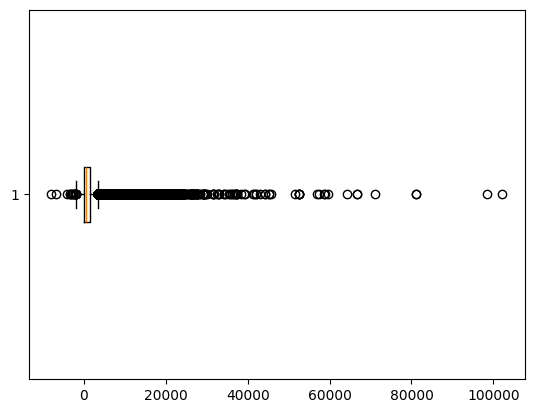

In [30]:
# Plot boxplot for balance feature
plt.boxplot(bank['balance'], vert=0)

Olhando para o resultado da boxplot, reparamos que a feature contém demasiados outliers, pela função describe() vemos que existe pelo menos 1 valor negativo, mas pela boxplot reparamos que existe demasiados valores negativos, o que é estranho sendo que estamos a falar do *Saldo Médio Anual*, vamos ver quantos valores negativos a variável apresenta.

In [31]:
count_nega = 0

for negative_value in bank['balance']:
    if negative_value < 0:
        count_nega += 1

proportion_nega = count_nega / len(bank) * 100

print("Number of negative values for balance feature: ", count_nega)
print("Total number of lines: ", len(bank))
print("Porportion of negative values for balance feature: ", proportion_nega)

Number of negative values for balance feature:  3766
Total number of lines:  45211
Porportion of negative values for balance feature:  8.329831235761208


Para perceber se estes dados são ou não prejudiciais para o modelo, vamos criar um histograma para perceber melhor os dados.

Text(0.5, 1.0, 'Histogram')

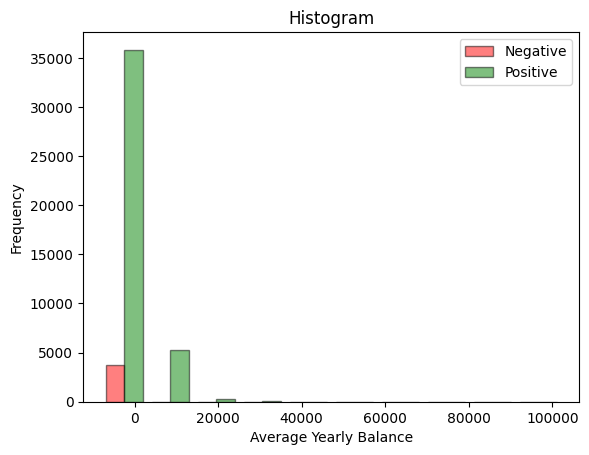

In [32]:
negative_values = bank['balance'][bank['balance']<0]
positive_values = bank['balance'][bank['balance']>=0]

plt.hist([negative_values, positive_values], bins=10, color=['red', 'green'], edgecolor='black', alpha=0.5, label=['Negative', 'Positive'])
plt.legend()

plt.xlabel('Average Yearly Balance')
plt.ylabel('Frequency')
plt.title('Histogram')

Pelo resultado dos dois gráficos podemos concluir que os valores negativos, são insignificativos e podem até ser mesmo prejudiciais para a aprendizagem mais tarde. Sendo que estamos a tratar de poucos dados negativos, podemos simplesmente removê-los.

In [33]:
# Removing all the negative values
bank = bank[bank['balance'] >= 0]

# Checking if the negative values were all removed
count_nega = 0
for nega in bank['balance']:
    if nega < 0:
        count_nega += 1

print("Number of negative values: ", count_nega)

Number of negative values:  0


Como podemos ver os valores negativos foram removidos. Agora temos de ver os outliers para os valores positivos. para perceber quantos valores temos usamos o método **Hampel Identifier**.

In [34]:
import numpy as np

def HampelIdentifier(df, var):
    x = df[var]

    med = np.median(x)
    mad = 1.4826 * np.median(np.abs(x - med))

    outliers_index = np.where(np.abs(x-med) > 3 * mad)[0]

    number_outliers = len(outliers_index)
    proportion = number_outliers / len(df)

    print("Outliers Indexes: ", outliers_index)
    print("Outliers: ", x.iloc[outliers_index])
    print("Proportion: ", proportion)
    print("Percentage: ", proportion*100)

HampelIdentifier(bank, 'balance')


Outliers Indexes:  [   32    56    60 ... 41438 41442 41444]
Outliers:  34       10635
65        6530
69       12223
70        5935
186       4384
         ...  
45185     4256
45191     3810
45204     2850
45208     5715
45210     2971
Name: balance, Length: 6211, dtype: int64
Proportion:  0.14986126191337917
Percentage:  14.986126191337917


Criamos uma função genérica chamada **HampelIdentifier()**, esta função recebe como entrada um dataframe e uma variável, usando *MAD* (Mean Absolute Deviation) calculamos o número total de outliers, os indices dos outliers e quais os outliers presentes na variável. Usamos o Hampel Identifier Method, por este ser mais robusto a outliers. Esta função, para além de retornar outliers, retorna também a proporção e a percentagem dos mesmo em relação ao tamanho do dataset.

Posto isto, reparamos que existem 6211 outliers, em que estes representam 14% dos dados para a variável *balance*. Como estes representam ainda uma boa quantia de dados, e como também não queremos perder informação que possa vir a ser útil para a aprendizagem do(s) modelo(s) futuramente, iremos analisar estes valores com mais atenção e mais a fundo.

Posto isto, iremos fazer uma transformação nos dados usando a ***função logarítmica***, esta é uma técnica muito usada para lidar com valores extremos ou assimetria nos dados (como vimos anteriormente no histograma, a nossa variável é assimétrica á direita). Esta técnica é especialmente útil quando os dados estão altamente concentrados em torno de valores baixos (Como podemos ver na nossa boxplot, os nossos outliers estão muito concentrados nos valores mais baixos, do que nos valores muito altos). Quando esta é aplicada a dados que estão fortemente inclinados para a direita, a transformação logarítmica tende a *espremer* os valores extremamente altos para mais perto dos valores típicos. Isto ajuda a tornar a distribuição dos dados mais simétrica e a reduzir o impacto dos outliers.

Text(0.5, 1.0, 'Logarithmic Balance Histogram')

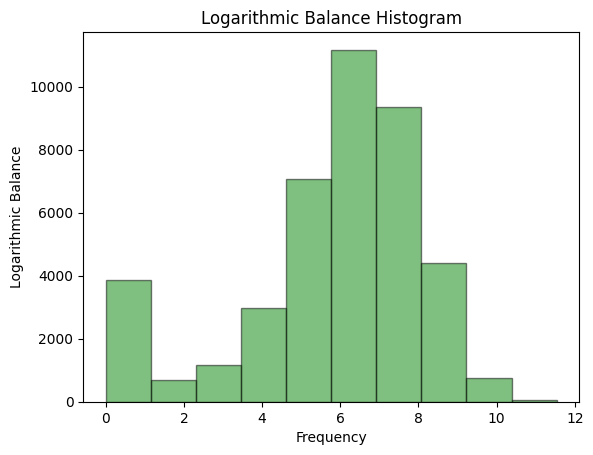

In [35]:
balance_log = np.log(bank['balance'] + 1)
bank.insert(loc=13, column='balance_log', value=balance_log)

plt.hist(bank['balance_log'], edgecolor='black', color='green', alpha=0.5, bins=10)

plt.xlabel('Frequency')
plt.ylabel('Logarithmic Balance')
plt.title('Logarithmic Balance Histogram')

{'whiskers': [<matplotlib.lines.Line2D at 0x1dee61361a0>,
 'caps': [<matplotlib.lines.Line2D at 0x1dee61366e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1dee6135f00>],
 'medians': [<matplotlib.lines.Line2D at 0x1dee6136c20>],
 'fliers': [<matplotlib.lines.Line2D at 0x1dee6136ec0>],
 'means': []}

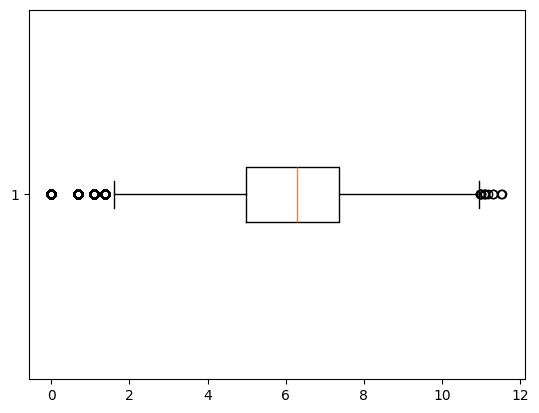

In [36]:
plt.boxplot(bank['balance_log'], vert=0)

Podemos tirar algumas conclusões sobre o resultado dos dois gráficos:

- Histograma:
    - Vemos que os nosso dados estão muito mais distribuidos que os dados originais, o que nos indica que os nossos dados estão mais próximos de uma distribuição normal.

- Boxplot:
    - Vemos que a quantidade dos outliers é mais reduzida.
    - Podemos concluir também que os outliers presentes após a transformação logarítmica, são valores extremos o que pode influenciar a aprendizagem mais tarde.

Posto isto, iremos calcular quantos outliers existem e a proporção dos mesmos, e ver se poderemos passar para a remoção dos mesmo ou até mesmo alterar os dados pela mediana, pois ser robusta a outliers (como foi dito anteriormente).

In [37]:
HampelIdentifier(bank, 'balance_log')

Outliers Indexes:  [    2     4     7 ... 41368 41391 41394]
Outliers:  2        1.098612
4        0.693147
7        1.098612
19       0.000000
24       0.000000
           ...   
45038    0.000000
45131    0.000000
45134    0.000000
45157    0.000000
45160    0.000000
Name: balance_log, Length: 3867, dtype: float64
Proportion:  0.09330437929786464
Percentage:  9.330437929786465


Usando novamente a função genérica criada anteriormente, **HampelIdentifier()**, verificamos que temos atualmente 3867 outliers. Uma vez que já efetuamos uma transformação, não é aconselhável efetuar outra em cima da mesma, porque podemos perder a interpretabilidade, e sobretudo, podemos aumentar o risco de expor os dados ao overfitting (Ao aplicar demasiadas transformações complexas, podemos correr o risco de subreajustar os nossos modelos aos dados de treino, o que não é adequado). 

In [38]:
print("Balance_log Variance: ", np.var(bank['balance_log']))
print("Balance Variance: ", np.var(bank['balance']))

Balance_log Variance:  5.6643036714404635
Balance Variance:  9820649.97650562


De seguida usamos também a função **var()** (Variância) da biblioteca *numpy* que serve para calcular a variância dos dados. Neste caso estamos a calcular para as variáveis *balance* e *balance_log*, para percebermos o quão distante estão os nossos dados da média. 

Posto isto, vemos que a nossa transformação diminui bastante a nossa variância o que podemos tirar algumas conclusões:

- **Menos Ruído ->** Pode indicar uma diminuição no ruído nos dados. Ou seja, pode resultar em uma representação mais precisa dos padrões subjacentes nos nossos dados, tonarndo mais fácil identificar tendências ou relações entre as variáveis.
- **Melhora a precisão ->** Pode levar a previsões mais precisas e confiáveis em modelos estatísticos. Ou seja, uma variância menor indica que as variações nos dados são mais previsiveis e menos sujeitas a flutuações aleatórias.
- **Maior Consistência ->** Pode indicar que os dados estão mais consitentes ou menos dispersos em torno da média. Ou seja, pode sugerir que os padrões dos nossos dados são mais previsiveis/estáveis. 

No entanto, mesmo após termos resultados bastante positivos, é sempre uma boa ideia explorar outras transformações e, em última análise, avaliar e decidir qual a que melhor se adequa aos nosso dados.

Text(0.5, 1.0, 'Reverse Values Histogram')

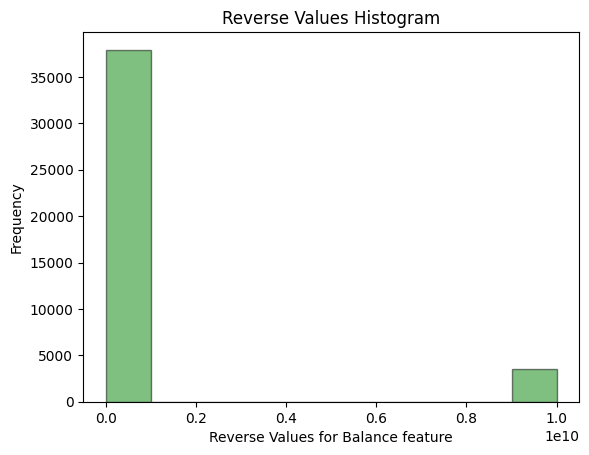

In [39]:
balance_reverse = 1 / (bank['balance'] + 1e-10)

bank.insert(loc=14, column='balance_reverse', value=balance_reverse)

plt.hist(bank['balance_reverse'], edgecolor='black', color='green', alpha=0.5, bins=10)
plt.xlabel('Reverse Values for Balance feature')
plt.ylabel('Frequency')
plt.title('Reverse Values Histogram')

{'whiskers': [<matplotlib.lines.Line2D at 0x1dee69310f0>,
 'caps': [<matplotlib.lines.Line2D at 0x1dee6931630>,
 'boxes': [<matplotlib.lines.Line2D at 0x1dee6930e50>],
 'medians': [<matplotlib.lines.Line2D at 0x1dee6931b70>],
 'fliers': [<matplotlib.lines.Line2D at 0x1dee6931e10>],
 'means': []}

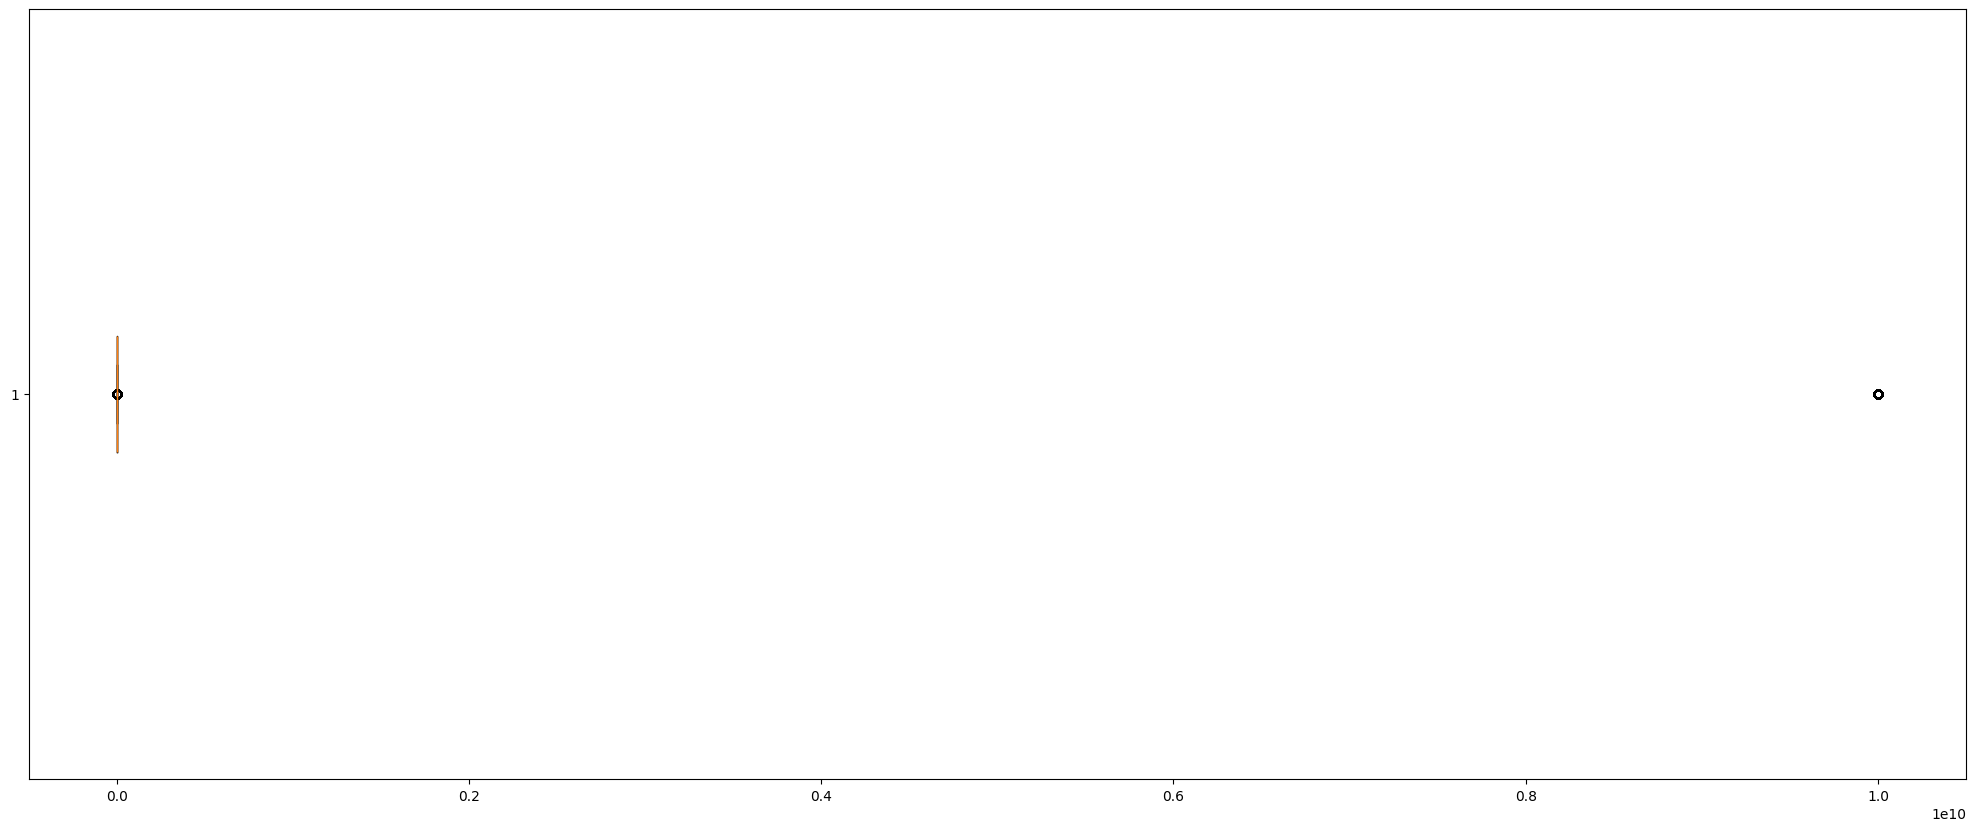

In [40]:
plt.figure(figsize=(25,10))
plt.boxplot(bank['balance_reverse'], vert=0)

In [41]:
HampelIdentifier(bank, 'balance_reverse')

Outliers Indexes:  [    1     2     4 ... 41400 41410 41437]
Outliers:  1        3.448276e-02
2        5.000000e-01
4        1.000000e+00
7        5.000000e-01
12       1.666667e-01
             ...     
45157    1.000000e+10
45160    1.000000e+10
45166    1.265823e-02
45176    1.515152e-02
45203    8.849558e-03
Name: balance_reverse, Length: 9303, dtype: float64
Proportion:  0.22446615997104596
Percentage:  22.446615997104598


In [42]:
print('Balance Variance: ', np.var(bank['balance']))
print('Balance_log Variance: ', np.var(bank['balance_log']))
print('Balance_reverse Variance: ', np.var(bank['balance_reverse']))

Balance Variance:  9820649.97650562
Balance_log Variance:  5.6643036714404635
Balance_reverse Variance:  7.759822043329381e+18


Aqui usamos a *Transformação de Reciprocidade*, esta envolve a inversão dos valores, ou seja, 1/x, e pode até mesmo reduzir os outliers.

Posto isto, logo pelos dois gráficos (Histograma e Boxplot), vemos que a transformação não melhorou muito os nossos dados.

- Histograma
    - Reparamos que a maior parte dos dados centram-se nos valores entre 0.0 a 0.1, mas que 5000 deles, aproximadamente, centram-se nos valores entre 0.9 a 1. Logo por aqui reparamos que podemos estar a ter uma redução de outliers pouco significativa, o que não justifica a nossa transformação.
    - Reparamos também que os nossos dados estão muito mal distribuidos após a transformação, o que também pode influenciar a precisão do nosso modelo de previsão.

- Boxplot
    - Reparamos que o nosso gráfico está meio estranho, parece não ter média,nem  mediana nem quartis. E mostra-nos que temos 1 outlier, que deve estar localizado no valor 1, aproximadamente, o que é estranho sendo que o histograma mostra-nos cerca de 5000 valores próximos de 1.

Usamos de seguida a função **HampelIdentifier()** para identificar principalmente a quantidade de outliers. E reparamos que após a transformação dos dados aumentamos a quantidade de outliers, o que foi um problema. Podemos concluir por aqui, que mais uma vez não justifica utilizarmos esta transformação.

De seguida calculamos a **Variância** para as variáveis *balance*, *balance_log* e *balance_reverse*, para vermos as diferenças e principalmente vermos se vale a penar transformar os dados ou não, e se sim qual transformação usar. Pelos valores, que a função nos retorna, vemos que a *transformação logarítmica* resultou numa variância melhor (mais baixa).

Após esta análise, reparamos que devemos transformar os dados usando a transformação logarítmica, sendo que esta foi a que melhor transformou os dados, e que melhor se portou. Isto é, foi a que conseguiu diminuir os outliers, estabilizar a variância e principalmente foi a que distribuiu melhor os dados.

Como também ainda estou presentes outliers para essa transformação, podemos concluir que esses são valores extremos e que não fazem muito sentido no dataset. Por isso, passemos para a remoção dos mesmos, mas antes disso, removemos a coluna *balance_reverse*, pois esta já não faz mais sentido no nosso dataset.

In [43]:
bank = bank.drop(columns='balance_reverse')
bank

,age,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,...,balance,housing,loan,day,month_sin,month_cos,campaign,pdays,previous,y
0,58,0,0,0,0,1,0,0,0,0,...,2143,1,0,5,0.5,-0.866025,1,-1,0,0
1,44,0,0,0,0,0,0,0,0,0,...,29,1,0,5,0.5,-0.866025,1,-1,0,0
2,33,0,0,1,0,0,0,0,0,0,...,2,1,1,5,0.5,-0.866025,1,-1,0,0
3,47,0,1,0,0,0,0,0,0,0,...,1506,1,0,5,0.5,-0.866025,1,-1,0,0
4,33,0,0,0,0,0,0,0,0,0,...,1,0,0,5,0.5,-0.866025,1,-1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,0,0,0,0,0,0,0,0,0,...,825,0,0,17,-0.5,0.866025,3,-1,0,1
45207,71,0,0,0,0,0,1,0,0,0,...,1729,0,0,17,-0.5,0.866025,2,-1,0,1
45208,72,0,0,0,0,0,1,0,0,0,...,5715,0,0,17,-0.5,0.866025,5,184,3,1
45209,57,0,1,0,0,0,0,0,0,0,...,668,0,0,17,-0.5,0.866025,4,-1,0,0


Agora que a nossa coluna foi removida, passamos para a remoção dos outliers.

In [44]:
def remove_outliers(df, outliers_index):
    outliers_index = [idx for idx in outliers_index if idx in df.index]
    
    df_without_outliers = df.drop(outliers_index)
    
    return df_without_outliers

med = np.median(bank['balance_log'])
mad = 1.4826 * np.median(np.abs(bank['balance_log'] - med))

outliers_index = np.where(np.abs(bank['balance_log'] - med) > 3 * mad)[0]

bank_without_outliers = remove_outliers(bank, outliers_index)

bank['balance_log'] = bank_without_outliers['balance_log']
bank

,age,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,...,balance,housing,loan,day,month_sin,month_cos,campaign,pdays,previous,y
0,58,0,0,0,0,1,0,0,0,0,...,2143,1,0,5,0.5,-0.866025,1,-1,0,0
1,44,0,0,0,0,0,0,0,0,0,...,29,1,0,5,0.5,-0.866025,1,-1,0,0
2,33,0,0,1,0,0,0,0,0,0,...,2,1,1,5,0.5,-0.866025,1,-1,0,0
3,47,0,1,0,0,0,0,0,0,0,...,1506,1,0,5,0.5,-0.866025,1,-1,0,0
4,33,0,0,0,0,0,0,0,0,0,...,1,0,0,5,0.5,-0.866025,1,-1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,0,0,0,0,0,0,0,0,0,...,825,0,0,17,-0.5,0.866025,3,-1,0,1
45207,71,0,0,0,0,0,1,0,0,0,...,1729,0,0,17,-0.5,0.866025,2,-1,0,1
45208,72,0,0,0,0,0,1,0,0,0,...,5715,0,0,17,-0.5,0.866025,5,184,3,1
45209,57,0,1,0,0,0,0,0,0,0,...,668,0,0,17,-0.5,0.866025,4,-1,0,0


Os valores omissos presentes na variável *balance_log* surgem porque removemos os outliers dessa variável, mas não eliminamos as mesmas linhas para as outras colunas. Assim, os valores ausentes ocorrem porque não informação nessas linhas para essa coluna específica.

Posto isto, poderiamos fazer uma imputação nos outliers, e alterar os valores omissos pela mediana. Mas ao fazer isso estamos a introduzir informação artificial nos nossos dados, e como antigamente esses dados eram outliers, o melhor a fazer é removermos a linha. Assim também respeitamos as nossas intenções anteriores. 

Isto também ajuda a evitar potenciais problemas de *Bias* (num modelo ou análise, indica a direção e a magnitude do erro sistemático. É essencial reduzi-lo para obter estimaticas precisas e confiáveis) ou *overfitting* que podem surgir ao imputar valores ou ao manter outliers nos dados.

In [45]:
bank = bank.dropna()
bank.isna().sum()

age                  0
job_admin.           0
job_blue-collar      0
job_entrepreneur     0
job_housemaid        0
job_management       0
job_retired          0
job_self-employed    0
job_services         0
job_student          0
job_technician       0
job_unemployed       0
job_unknown          0
balance_log          0
marital_divorced     0
marital_married      0
marital_single       0
education            0
default              0
balance              0
housing              0
loan                 0
day                  0
month_sin            0
month_cos            0
campaign             0
pdays                0
previous             0
y                    0
dtype: int64

Aqui vemos que os valores omissos foram removidos.

Agora temos duas variáveis com o mesmo tipo de informação, *balance* (coluna original do dataset) e *balance_log* (coluna balance após a transformação logarítmica), mesmo que estas colunas tenham valores diferentes, a essência delas para o target é o mesmo, ambas explicam o *Saldo Médio Anual*.

Como a variável transformada apresenta uma distribuição mais adequada, menos outliers e uma variância mais favorável/estabilizada em comparação com a variável original, então é uma boa prática remover a coluna original e manter apenas a transformada.

Ao manter apenas a coluna transformada, simplificamos os dados e podemos até melhorar o desempenho dos modelos subsequentes, reduzindo a dimensionalidade e removendo abundâncias. Além disso, evitamos confusão e reduzimos a possibilidade de erros ao trabalhar com múltiplas versões da mesma variável.

Não o vamos fazer já, sendo que mais à frente vamos precisar para interpretar melhor as outras varáveis, porque esta dá-nos uma melhor perpestiva sobre os valores reais do saldo.

Como podemos ver, o nosso indice está todo alterado, porque anteriormente removemos as linhas dos dados onde balance era negativo, o que nos alterou o indice todo. E só por uma questão de visualização, vamos ordenar o indice de novo.

In [46]:
bank.reset_index(drop=True, inplace=True)
bank

,age,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,...,balance,housing,loan,day,month_sin,month_cos,campaign,pdays,previous,y
0,58,0,0,0,0,1,0,0,0,0,...,2143,1,0,5,0.5,-0.866025,1,-1,0,0
1,44,0,0,0,0,0,0,0,0,0,...,29,1,0,5,0.5,-0.866025,1,-1,0,0
2,47,0,1,0,0,0,0,0,0,0,...,1506,1,0,5,0.5,-0.866025,1,-1,0,0
3,35,0,0,0,0,1,0,0,0,0,...,231,1,0,5,0.5,-0.866025,1,-1,0,0
4,28,0,0,0,0,1,0,0,0,0,...,447,1,1,5,0.5,-0.866025,1,-1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37941,51,0,0,0,0,0,0,0,0,0,...,825,0,0,17,-0.5,0.866025,3,-1,0,1
37942,71,0,0,0,0,0,1,0,0,0,...,1729,0,0,17,-0.5,0.866025,2,-1,0,1
37943,72,0,0,0,0,0,1,0,0,0,...,5715,0,0,17,-0.5,0.866025,5,184,3,1
37944,57,0,1,0,0,0,0,0,0,0,...,668,0,0,17,-0.5,0.866025,4,-1,0,0


### *Dealing with Outleirs for Pdays Feature*

In [47]:
bank['pdays'].describe()

count    37946.000000
mean        42.083751
std        101.624747
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         -1.000000
max        871.000000
Name: pdays, dtype: float64

Olhando para o resultado da função, vemos que a mediana (valor para 50%) foge bastante da média. Isto pode acontecer por dois motivos:
- **1º** -> Esta variável apresenta diversos outliers.
- **2º** -> Como a variável apresenta valores -1, que significa que o cliente nunca foi contactado anteriormente, faz com que a média seja alterada e que a mediana fuja muito da média. Temos de ter bastante cuidado com esta variável sendo que os valores que possam ser considerados outliers, na verdade podem não o ser.

Posto isto, a nossa ideia será retirar todos os valores -1 da variável em questão e criar uma nova variável binária. Ou seja, a nova variável irá nos dizer se o cliente foi ou não contactado anteriormente, ajudando-nos com a nossa análise.

Isto pode ser também um problema, pois se a variável *pdays* tiver com demasiados valores -1, vamos estar a criar muitos valores omissos, que poderão ser removidos ou alterados (adicionando informação falsa para o modelo).

Primeiramente, o mais importante será talvez ver quantos valores temos -1, pois os próximo passo seria retirar esses valores da variável, e se houver bastantes valores -1, ao retirá-los vamos introduzir muitos valores omissos.

In [48]:
count_negatives1 = 0

for no_contact in bank['pdays']:
    if no_contact == -1:
        count_negatives1 += 1

proportion_negatives1 = count_negatives1 / len(bank) * 100

print('Number of -1 numbers in pdays feature:', count_negatives1)
print('Total number of rows:', len(bank))
print('Proportion:', proportion_negatives1,'%')
print("Variance:", np.var(bank['pdays']))

Number of -1 numbers in pdays feature: 30568
Total number of rows: 37946
Proportion: 80.55658040373162 %
Variance: 10327.317025262626


Como podemos ver pelo resultado do nosso código, vemos que 80% dos dados da variável *pdays*, são valores -1, o que indica que se retirarmos esses valores e criarmos outra variável, vamos trazer 30568 valores omissos em 37946.

Text(0, 0.5, 'Frequency')

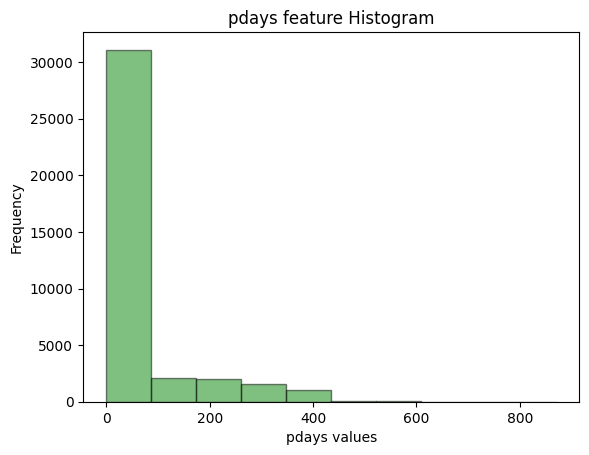

In [49]:
plt.hist(bank['pdays'], edgecolor='black', color='green', alpha=0.5, bins=10)
plt.title('pdays feature Histogram')
plt.xlabel('pdays values')
plt.ylabel('Frequency')

<Axes: >

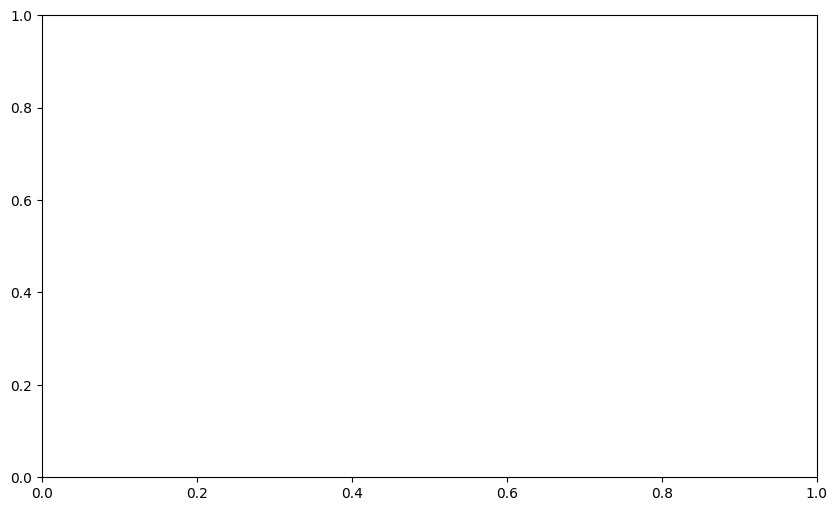

In [50]:
import seaborn as sns

plt.figure(figsize=(10,6))
sns.violinplot()

Como podemos ver pelas plots, reparamos que a nossa variável *pdays* é altamente assimétrica á direita e que todos os valores que não sejam -1 são considerados outliers. Como ela é altamente assimétrica, iremos efetuar uma transformação logarítmica sendo que esta é útil para valores altamente assimétricos à direita. Ela ajuda a *espremer* os valores extremos e reduzir a amplitude da cauda longa.

Reparamos principalmente, na quantidade de outliers que existe na variável em questão, pela boxplot.

C:\Users\diogo\AppData\Local\Temp\ipykernel_15796\330531550.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bank['pdays_log'] = bank['pdays'].copy()


Text(0, 0.5, 'Frequency')

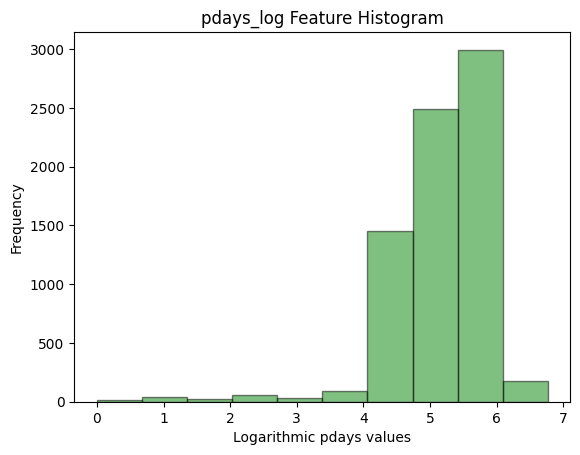

In [51]:
bank['pdays_log'] = bank['pdays'].copy()

bank.loc[bank['pdays_log'] == -1, 'pdays_log'] = np.nan

bank.loc[bank['pdays_log'].notnull(), 'pdays_log'] = np.log(bank.loc[bank['pdays_log'].notnull(), 'pdays'])

plt.hist(bank['pdays_log'], edgecolor='black', color='green', bins=10, alpha=0.5)
plt.title('pdays_log Feature Histogram')
plt.xlabel('Logarithmic pdays values')
plt.ylabel('Frequency')

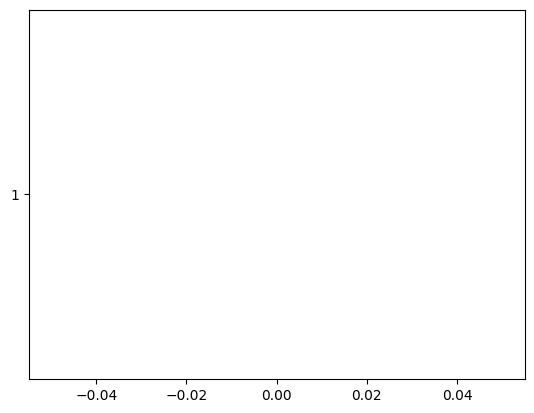

In [52]:
plt.boxplot(bank['pdays_log'], vert=False)
plt.show()

Reparamos agora que a nossa transformação não correu como esperado. O esperado seria melhorar a distribuição, apesar de não ter piorado assim tanto, não melhorou também. Na variável original, *pdays*, a nossa distribuição é assimétrica á direita, agora para a variável transformada, *pdays_log*, vemos que a distribuição é assimétrica á esquerda.

Reparamos também que a nossa boxplot não retorna nada, isto pode indicar que não há variabilidade nos dados  ou que todos os valores estão agrupados muito próximos uns dos outros após a transformação. Pode ter acontecido, porque ou os valores são muito próximos ou a distribuição é altamente concentrada.

E por fim reparamos que a nossa variância baixou drasticamente, isto pode indicar que esta transformação pode não ser adequada para estes dados.

Posto isto, como esta transformação não é adequada aos nossos dados, iremos remover a feature do nosso dataset para removermos dimensionalidade e não criarmos ruído aos nossos dados.

In [53]:
bank = bank.drop(columns='pdays_log')
bank

,age,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,...,balance,housing,loan,day,month_sin,month_cos,campaign,pdays,previous,y
0,58,0,0,0,0,1,0,0,0,0,...,2143,1,0,5,0.5,-0.866025,1,-1,0,0
1,44,0,0,0,0,0,0,0,0,0,...,29,1,0,5,0.5,-0.866025,1,-1,0,0
2,47,0,1,0,0,0,0,0,0,0,...,1506,1,0,5,0.5,-0.866025,1,-1,0,0
3,35,0,0,0,0,1,0,0,0,0,...,231,1,0,5,0.5,-0.866025,1,-1,0,0
4,28,0,0,0,0,1,0,0,0,0,...,447,1,1,5,0.5,-0.866025,1,-1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37941,51,0,0,0,0,0,0,0,0,0,...,825,0,0,17,-0.5,0.866025,3,-1,0,1
37942,71,0,0,0,0,0,1,0,0,0,...,1729,0,0,17,-0.5,0.866025,2,-1,0,1
37943,72,0,0,0,0,0,1,0,0,0,...,5715,0,0,17,-0.5,0.866025,5,184,3,1
37944,57,0,1,0,0,0,0,0,0,0,...,668,0,0,17,-0.5,0.866025,4,-1,0,0


Agora que a feature foi removida, vamos tentar transformar os dados novamente.

Desta vez iremos utilizar a *Transformação Yeo-Johnson*, é uma extensão da *Transformação Box-Cox* e foi desenvolvida para lidar com dados não positivos (nulos ou negativos), o que torna mais flexível em comparação com a *Transformação de Box-Cox* original. 

In [54]:
from scipy.stats import yeojohnson

pdays_yeo, lambda_chosen = yeojohnson(bank['pdays'])

bank.insert(loc=13, column='pdays_yeo', value= pdays_yeo)

print("Lambda Chosen:", lambda_chosen)
bank

Lambda Chosen: -0.5613185995303416


,age,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,...,balance,housing,loan,day,month_sin,month_cos,campaign,pdays,previous,y
0,58,0,0,0,0,1,0,0,0,0,...,2143,1,0,5,0.5,-0.866025,1,-1,0,0
1,44,0,0,0,0,0,0,0,0,0,...,29,1,0,5,0.5,-0.866025,1,-1,0,0
2,47,0,1,0,0,0,0,0,0,0,...,1506,1,0,5,0.5,-0.866025,1,-1,0,0
3,35,0,0,0,0,1,0,0,0,0,...,231,1,0,5,0.5,-0.866025,1,-1,0,0
4,28,0,0,0,0,1,0,0,0,0,...,447,1,1,5,0.5,-0.866025,1,-1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37941,51,0,0,0,0,0,0,0,0,0,...,825,0,0,17,-0.5,0.866025,3,-1,0,1
37942,71,0,0,0,0,0,1,0,0,0,...,1729,0,0,17,-0.5,0.866025,2,-1,0,1
37943,72,0,0,0,0,0,1,0,0,0,...,5715,0,0,17,-0.5,0.866025,5,184,3,1
37944,57,0,1,0,0,0,0,0,0,0,...,668,0,0,17,-0.5,0.866025,4,-1,0,0


Text(0, 0.5, 'Frequency')

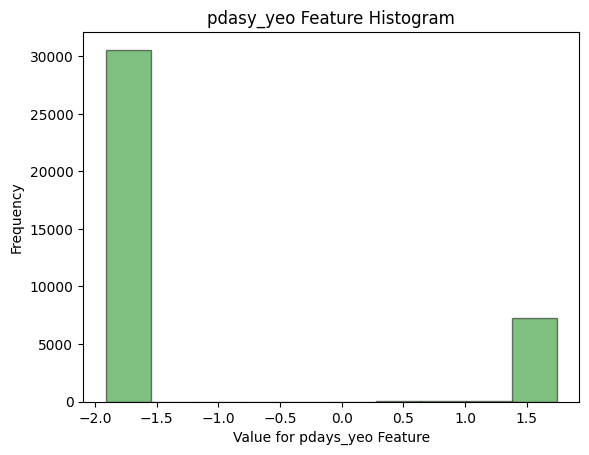

In [55]:
plt.hist(bank['pdays_yeo'], edgecolor='black', color='green', alpha=0.5, bins=10)
plt.title('pdasy_yeo Feature Histogram')
plt.xlabel('Value for pdays_yeo Feature')
plt.ylabel('Frequency')

{'whiskers': [<matplotlib.lines.Line2D at 0x1dee8054f10>,
 'caps': [<matplotlib.lines.Line2D at 0x1dee8055450>,
 'boxes': [<matplotlib.lines.Line2D at 0x1dee8054c70>],
 'medians': [<matplotlib.lines.Line2D at 0x1dee8055990>],
 'fliers': [<matplotlib.lines.Line2D at 0x1dee8055c30>],
 'means': []}

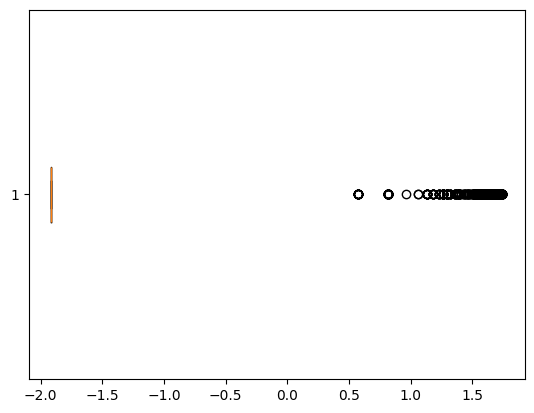

In [56]:
plt.boxplot(bank['pdays_yeo'], vert=0)

In [57]:
print('Variance for pdays_yeo Feature:', np.var(bank['pdays_yeo']))
print('Variace for pdays:', np.var(bank['pdays']))

Variance for pdays_yeo Feature: 2.0177849842882796
Variace for pdays: 10327.317025262626


Aqui usamos a *transformação Yeo-Johnson*, para ver se conseguimos ter uma melhor distribuição dos dados, e para ver os dados que realmente são outliers.

Como podemos ver, a nossa variância alterou drasticamente novamente, e a nossa distribuição não melhorou nada. Podemos concluir que esta transformação não seja também adequada para o nosso dataset.

Com isto, podemos concluir também que talvez seja melhor estudar/analisar a variável primeiro, e depois prosseguir com as devidas alterações.

Posto isto, iremos remover essa coluna do dataset, sendo que ela não nos traz nenhuma informação valiosa para o modelo

In [58]:
bank = bank.drop(columns='pdays_yeo')
bank

,age,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,...,balance,housing,loan,day,month_sin,month_cos,campaign,pdays,previous,y
0,58,0,0,0,0,1,0,0,0,0,...,2143,1,0,5,0.5,-0.866025,1,-1,0,0
1,44,0,0,0,0,0,0,0,0,0,...,29,1,0,5,0.5,-0.866025,1,-1,0,0
2,47,0,1,0,0,0,0,0,0,0,...,1506,1,0,5,0.5,-0.866025,1,-1,0,0
3,35,0,0,0,0,1,0,0,0,0,...,231,1,0,5,0.5,-0.866025,1,-1,0,0
4,28,0,0,0,0,1,0,0,0,0,...,447,1,1,5,0.5,-0.866025,1,-1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37941,51,0,0,0,0,0,0,0,0,0,...,825,0,0,17,-0.5,0.866025,3,-1,0,1
37942,71,0,0,0,0,0,1,0,0,0,...,1729,0,0,17,-0.5,0.866025,2,-1,0,1
37943,72,0,0,0,0,0,1,0,0,0,...,5715,0,0,17,-0.5,0.866025,5,184,3,1
37944,57,0,1,0,0,0,0,0,0,0,...,668,0,0,17,-0.5,0.866025,4,-1,0,0


In [59]:
x = np.sum((bank['pdays'] >= 365) & (bank['balance'] <= 10000))
y = np.sum((bank['pdays'] >= 365) & (bank['balance'] >= 10000))
more = np.sum((bank['balance'] >= 10000))
less = np.sum((bank['balance'] < 10000))

print('All the clients with more than 10000 as their yearly balance:', more)
print('All the clients with less than 10000 as their yearly balance:', less)
print('Number of clients that were contacted in the last year with less than 10000 as their yearly balance:', x)
print('Number of clients that were contacted in the last year with more than 10000 as their yearly balance:', y)

All the clients with more than 10000 as their yearly balance: 764
All the clients with less than 10000 as their yearly balance: 37182
Number of clients that were contacted in the last year with less than 10000 as their yearly balance: 617
Number of clients that were contacted in the last year with more than 10000 as their yearly balance: 12


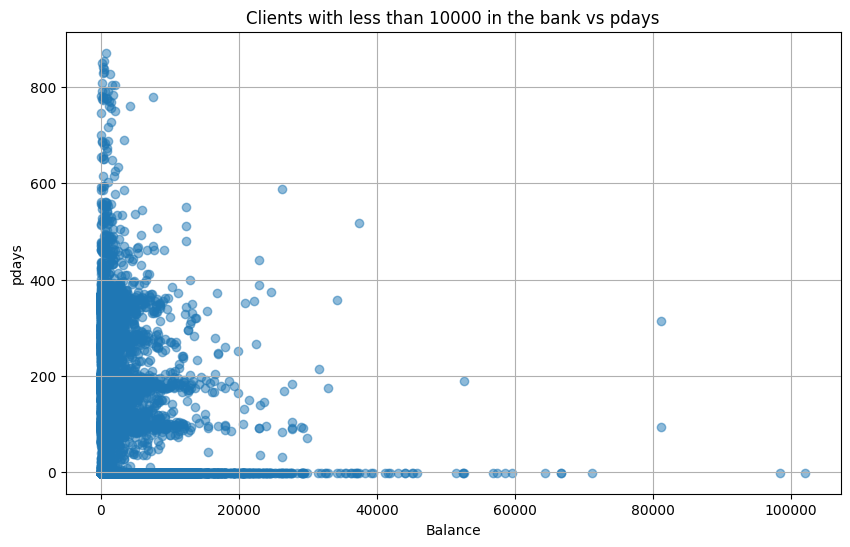

In [60]:
plt.figure(figsize=(10,6))
plt.scatter(bank['balance'], bank['pdays'], alpha=0.50)
plt.title('Clients with less than 10000 in the bank vs pdays')
plt.xlabel('Balance')
plt.ylabel('pdays')
plt.grid(True)
plt.show()

Aqui verificamos qual era a relação entre *Saldo Médio Anual* (balance) e o número de dias desde o último contacto pelo banco (pdays). Com esta relação verificamos que quanto mais o cliente tem em termos de *balance* a probabilidade de ser contactado é menor. Isto significa, que a campanha é maioritariamente direcionada aos clientes com menos posses.

Como a variável pdays, possui uma grande parte valores -1, e como esses valores são importantes, não os devemos remover nem substituir por outros valores.

Mesmo que as estatísticas descritivas, boxplots e os gráficos de barras, nos mostrem que existe outliers, podemos concluir que os valores -1 contribuiem para que essas medidas nos mostrem outliers. E que esta variável não os possui. Posto isto, não iremos tratar de mais outliers para esta variável.

## *Removing balance feature from the dataset*

In [61]:
bank = bank.drop(columns='balance')
bank

,age,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,...,default,housing,loan,day,month_sin,month_cos,campaign,pdays,previous,y
0,58,0,0,0,0,1,0,0,0,0,...,0,1,0,5,0.5,-0.866025,1,-1,0,0
1,44,0,0,0,0,0,0,0,0,0,...,0,1,0,5,0.5,-0.866025,1,-1,0,0
2,47,0,1,0,0,0,0,0,0,0,...,0,1,0,5,0.5,-0.866025,1,-1,0,0
3,35,0,0,0,0,1,0,0,0,0,...,0,1,0,5,0.5,-0.866025,1,-1,0,0
4,28,0,0,0,0,1,0,0,0,0,...,0,1,1,5,0.5,-0.866025,1,-1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37941,51,0,0,0,0,0,0,0,0,0,...,0,0,0,17,-0.5,0.866025,3,-1,0,1
37942,71,0,0,0,0,0,1,0,0,0,...,0,0,0,17,-0.5,0.866025,2,-1,0,1
37943,72,0,0,0,0,0,1,0,0,0,...,0,0,0,17,-0.5,0.866025,5,184,3,1
37944,57,0,1,0,0,0,0,0,0,0,...,0,0,0,17,-0.5,0.866025,4,-1,0,0


Para terminar a nossa a nossa Análise Exploratória e o Pré-Processamento dos dados, removemos a variável *balance* do nosso datsset, como vimos anteriormente.

# ***Unsupervised Learning***

*Unsupervised Learning*, envolve o trabalho com dados unlabeled (não rotulados), em que o algoritmo explora a estrutura e os padrões inerentes à entrada sem orientação explícita de saída. Resumindo, o objetivo principal da Análise Não Supervisionada, é descobrir a estrutura subjacente nos dados, seja identificando grupos de instâncias semelhantes, reduzindo a dimensionalidade dos dados ou identificando parões comuns.

## *Data Scaling*

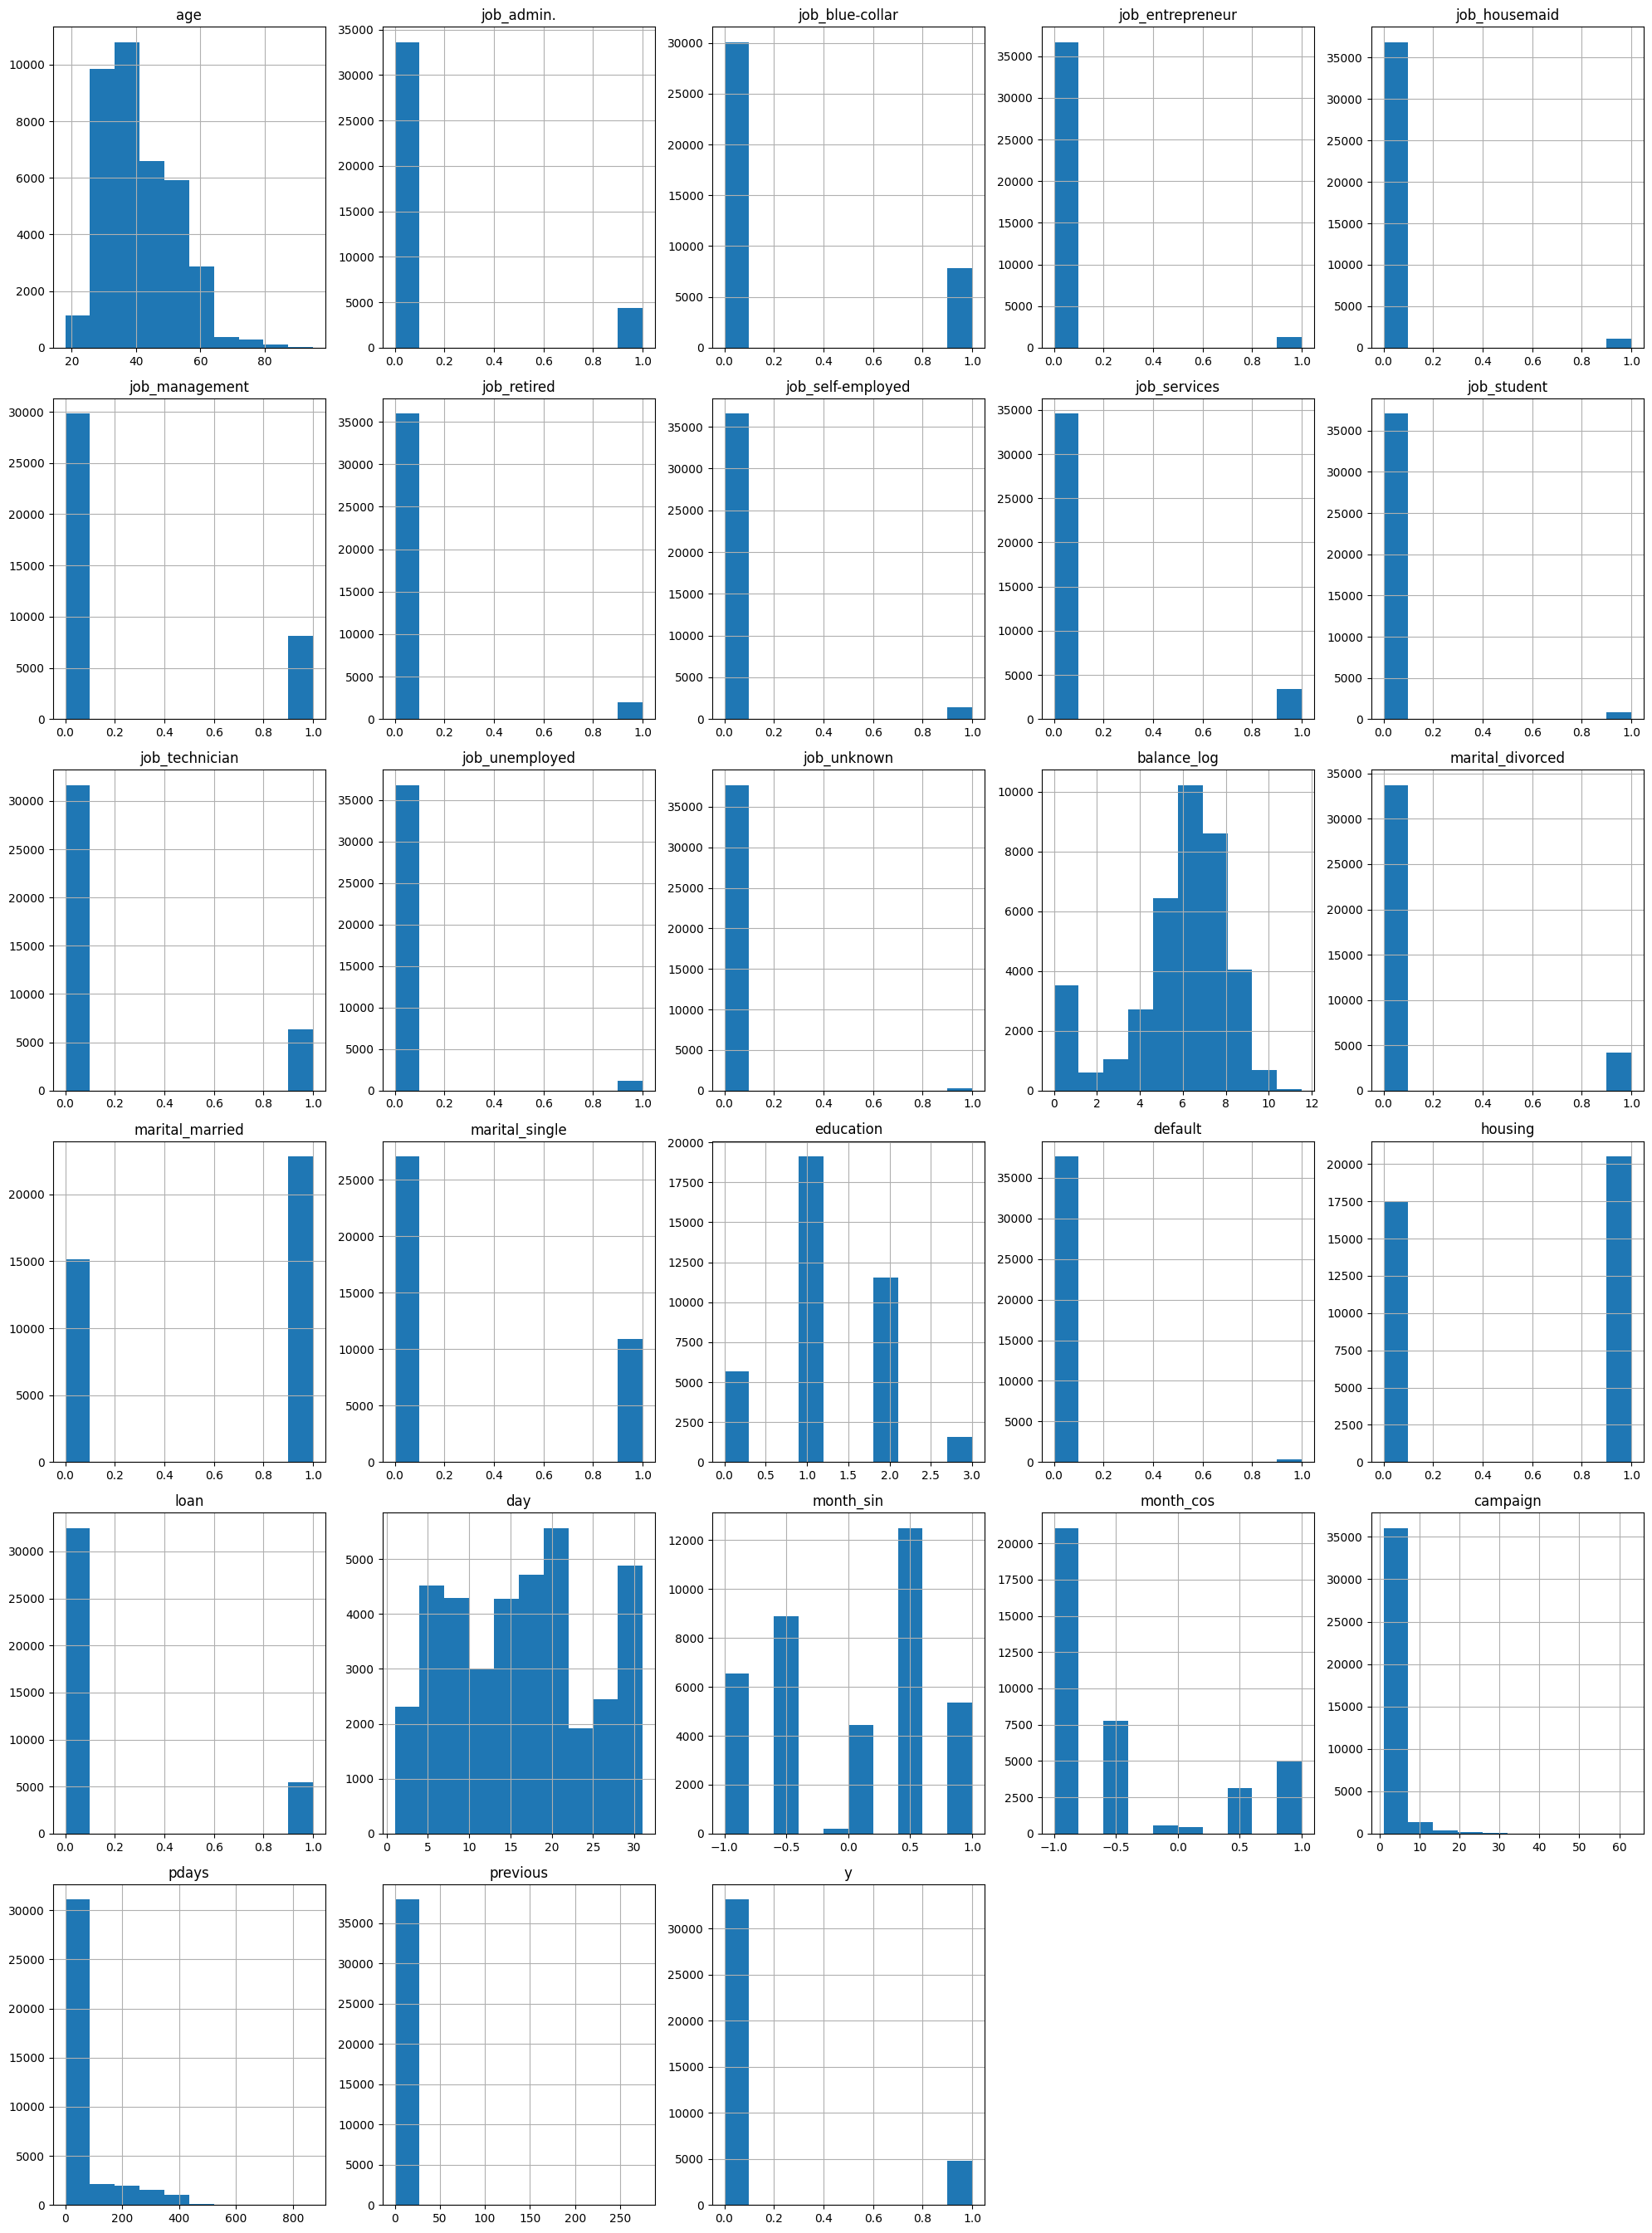

In [62]:
bank.hist(figsize=(20,27))
plt.tight_layout()
plt.show()

Aqui visualizamos os histogramas para todas as variáveis, para mais tarde fazermos o nosso escalamento de dados.

Como *Data Scaling* usa apenas variáveis numéricas, e vemos que as nossas variáveis numéricas chegam a ter uma distribuição mais perto da normal, o mais adequado será utilizar o **Standard Scaler**.

In [63]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

bank_scaled = scaler.fit_transform(bank)
bank_scaled = pd.DataFrame(bank_scaled, columns=bank.columns)

bank_scaled

,age,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,...,default,housing,loan,day,month_sin,month_cos,campaign,pdays,previous,y
0,1.567742,-0.358991,-0.511086,-0.183952,-0.171159,1.915947,-0.234757,-0.193756,-0.311789,-0.153454,...,-0.093949,0.922314,-0.409572,-1.292330,0.777197,-0.652302,-0.568875,-0.423955,-0.256498,-0.379818
1,0.272851,-0.358991,-0.511086,-0.183952,-0.171159,-0.521935,-0.234757,-0.193756,-0.311789,-0.153454,...,-0.093949,0.922314,-0.409572,-1.292330,0.777197,-0.652302,-0.568875,-0.423955,-0.256498,-0.379818
2,0.550327,-0.358991,1.956617,-0.183952,-0.171159,-0.521935,-0.234757,-0.193756,-0.311789,-0.153454,...,-0.093949,0.922314,-0.409572,-1.292330,0.777197,-0.652302,-0.568875,-0.423955,-0.256498,-0.379818
3,-0.559580,-0.358991,-0.511086,-0.183952,-0.171159,1.915947,-0.234757,-0.193756,-0.311789,-0.153454,...,-0.093949,0.922314,-0.409572,-1.292330,0.777197,-0.652302,-0.568875,-0.423955,-0.256498,-0.379818
4,-1.207026,-0.358991,-0.511086,-0.183952,-0.171159,1.915947,-0.234757,-0.193756,-0.311789,-0.153454,...,-0.093949,0.922314,2.441576,-1.292330,0.777197,-0.652302,-0.568875,-0.423955,-0.256498,-0.379818
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37941,0.920296,-0.358991,-0.511086,-0.183952,-0.171159,-0.521935,-0.234757,-0.193756,-0.311789,-0.153454,...,-0.093949,-1.084229,-0.409572,0.146288,-0.839538,2.017182,0.089000,-0.423955,-0.256498,2.632842
37942,2.770142,-0.358991,-0.511086,-0.183952,-0.171159,-0.521935,4.259731,-0.193756,-0.311789,-0.153454,...,-0.093949,-1.084229,-0.409572,0.146288,-0.839538,2.017182,-0.239937,-0.423955,-0.256498,2.632842
37943,2.862634,-0.358991,-0.511086,-0.183952,-0.171159,-0.521935,4.259731,-0.193756,-0.311789,-0.153454,...,-0.093949,-1.084229,-0.409572,0.146288,-0.839538,2.017182,0.746875,1.396492,0.979186,2.632842
37944,1.475250,-0.358991,1.956617,-0.183952,-0.171159,-0.521935,-0.234757,-0.193756,-0.311789,-0.153454,...,-0.093949,-1.084229,-0.409572,0.146288,-0.839538,2.017182,0.417938,-0.423955,-0.256498,-0.379818


## *Dimensionality Reduction Techniques*

### **Principal Component Analysis (PCA)**

Aqui utilizaremos primeiramente os PCAs, para reduzirmos a dimensionalidade do dataset. Comecemos primeiro com algumas técnicas, para conseguirmos perceber qual o melhor número adequado de PCAs.

#### **Critério de Kaiser**

In [64]:
cov_matrix = np.cov(bank.T)

eigenvalue, _ = np.linalg.eig(cov_matrix)

num_components_kaiser = np.sum(eigenvalue > 1)

print("Number of Principal Components using the Kaiser method:", num_components_kaiser)

Number of Principal Components using the Kaiser method: 6


Pelo Critério de Kaiser, vemos que o número adequado de PCAs, são 6. Como reparamos numa grande diferença de features, ou seja, reduzimos o nosso número de features radicalmente, iremos fazer um *Scree Plot* para ver quanto explicam nos nossos dados e tentar perceber se é uma boa escolha ou não.

#### **Sree Plot** - *Gráfico de Variância Explicada Cumulativa* 

In [65]:
from sklearn.decomposition import PCA

nums = np.arange(29)

var_ratio = []
for num in nums:
  pca = PCA(n_components=num)
  pca.fit(bank_scaled)
  var_ratio.append(np.sum(pca.explained_variance_ratio_))

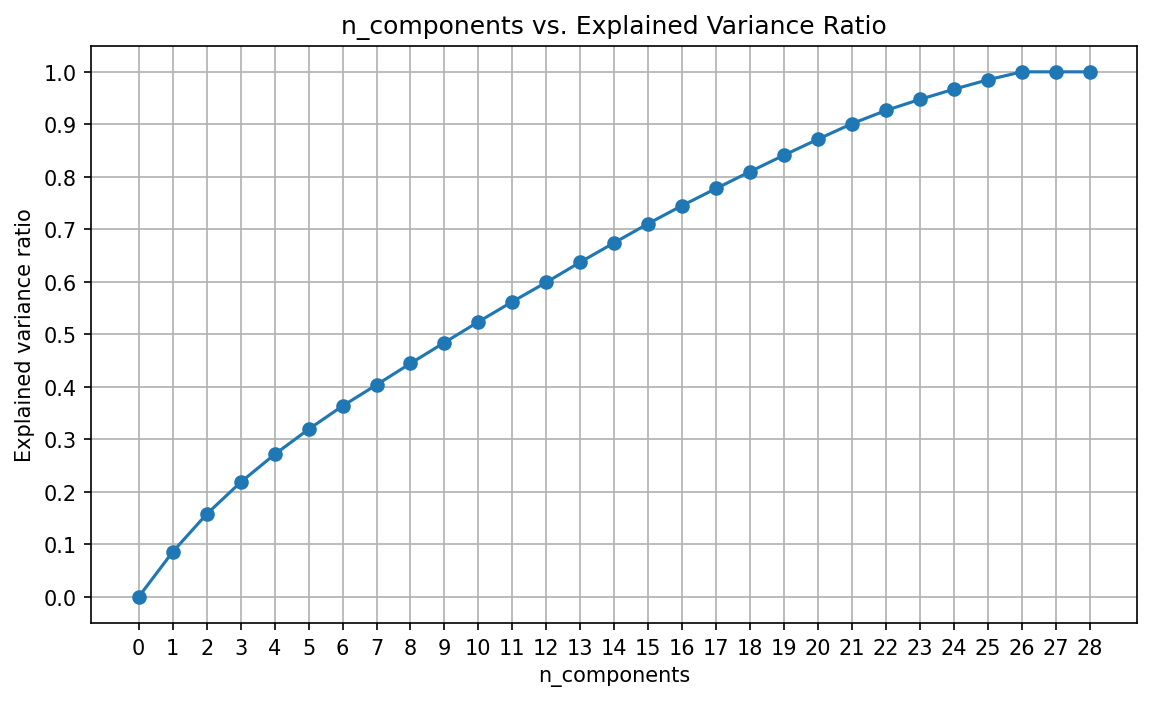

In [66]:
plt.figure(figsize=(9,5),dpi=150)
plt.grid()
plt.plot(nums,var_ratio,marker='o')
plt.xlabel('n_components')
plt.ylabel('Explained variance ratio')
plt.title('n_components vs. Explained Variance Ratio')
plt.xticks(nums)
plt.yticks(np.arange(0,1.1,0.1))
plt.show()

Pela *Scree Plot*, verificamos que 6 PCAs explicam apenas 40% dos dados. O que é bastante pouco.

Reparamos também que poderíamos reduzir para 25, mas sendo que inicialmente começamos com 28 features, reduzir para 25 não será computacionalmente tão bom. Portanto, podemos concluir que usar PCA não será uma boa escolha para os nossos dados, ou seja, não será adequado.

#### **Data Visualization**

Para a visualização dos nossos dados, iremos utilizar 1 PCA, mesmo que este explica nem sequer 10% dos dados, iremos visualizar, só para termos uma ideia de como ficam os nossos dados.

In [67]:
pca = PCA(n_components=2)
pca_bank = pca.fit_transform(bank_scaled)

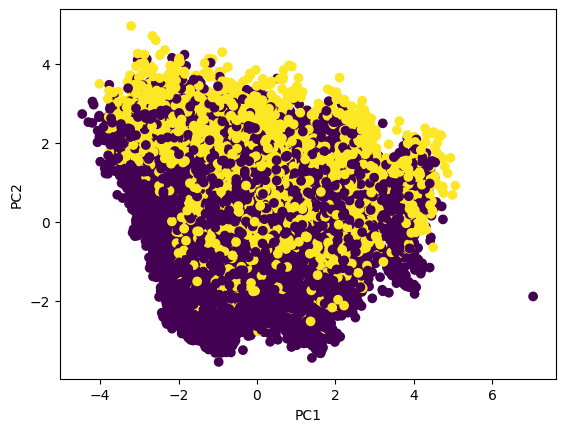

In [68]:
plt.scatter(pca_bank[:,0], pca_bank[:,1], c=bank['y'])
#plt.scatter(pca_df[:,0], pca_df[:,1], c=Target)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

A partir deste gráfico podemos concluir que há uma clara distinção entre os dois grupos de pontos no gráfico. Porém existe também alguma sobreposição entre os dois grupos, particularmente, na área onde PC1 é próximo de 1 e PC2 está entre 1 e 2. Isto indica que, enquanto os grupos são distintos, eles não são completamente separados.

### **t-Distributed Stochastic Neighbor Embedding (t-SNE)**

Vamos criar um t-SNE com apenas 2 componentes, só para termos visualizarmos, para termos uma ideia sobre os dados.

#### **t-SNE creation with 2 components**

In [69]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2)
tsne_bank = tsne.fit_transform(bank_scaled)

#### **Data Visualization**

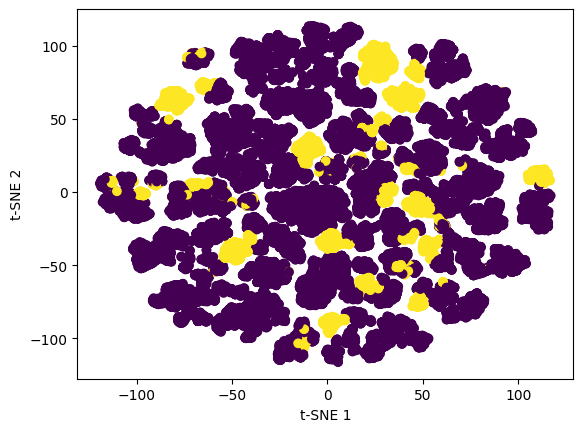

In [70]:
plt.scatter(tsne_bank[:,0], tsne_bank[:,1], c=bank['y'])
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.show()

Notamos uma boa diferença entre os PCAs e os t-SNEs.

A partir deste gráfico, podemos concluir que temos uma boa distinção dos nossos dados, porém estes não são bem separados, como foi o caso dos PCAs, reparamos que há sitios onde o amarelo se junta demasiado ao roxo.

## *Clustering*

Agora que passamos da redução de dimensionalidade, iremos criar os nossos clusters. Aqui iremos agrupar os nossos dados com base no nosso target, a variável *y*. Os nossos grupos vão ser dividos entre os clientes que já ou não depositaram.

### **K-Means**

Iremos começar por usar o algoritmo K-Means.

Sendo que estamos a tratar de uma variável binária (1 e 0), já sabemos que o número idela de clusters são 2.

In [71]:
from sklearn.cluster import KMeans

kmeans_random = KMeans(
    init='random',
    n_clusters=2,
    n_init=10,
    max_iter=300,
    random_state=42
)

kmeans_random.fit(bank_scaled)

KMeans(init='random', n_clusters=2, n_init=10, random_state=42)

In [72]:
labels_random = kmeans_random.labels_

pd.crosstab(labels_random, bank['y'], rownames=['clusters'])

y,0,1
clusters,,
0,12799,2277
1,20363,2507


Após a criação do nosso cluster K-Means, vemos pela crosstab, que temos bem mais valores falsos que verdadeiros. Mas podemos tirar mais informações acerca disso.

Vemos que o nosso clsuter com valor 0 não está assim tão mau, sendo que para o cluster 0 vemos uma diferença grande na distribuição dos valores. Porém para o cluster 1 não temos essa mesma diferença, vemos que os valores presentes nesse cluster são muito parecidos. Para termos uma melhor perspetiva, o melhor será sempre fazer um gráfico.

#### **Data Visualization**

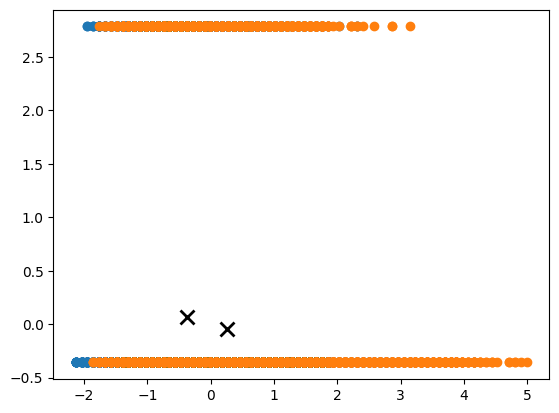

In [73]:
centroids_random = kmeans_random.cluster_centers_
bank_scaled_reset = bank_scaled.reset_index(drop=True)

k=2

for i in range(k):
    ds = bank_scaled_reset.iloc[np.where(labels_random==i)[0]]
    plt.plot(ds.iloc[:,0], ds.iloc[:,1], 'o')
    lines = plt.plot(centroids_random[i,0], centroids_random[i,1], 'kx')
    plt.setp(lines, ms=10.0)
    plt.setp(lines, mew=2.0)

plt.show()

Por este gráfico podemos ver que não temos os dados tão bem agrupados como pensavamos. Cada cor representa um tipo de dados, neste caso podemos dizer que os amarelos representam valores iguais a 0 e os azuis representam 1, sendo que existem mais valores 0 que 1, e vemos claramente pelo gráfico que existem mais pontos laranjas que azuis.

Posto isto, vemos que está mal divido, vemos que existem vários pontos laranjas para o cluster acima (1), ou seja para o cluster que deveria ser mais azul, porém o cluster abaixo (0), vemos que existem pontos azuis, mas não são assim tantos.

Poderiamos fazer testes e usar métodos para determinar o número ideal de clusters para este problema, contudo, estamos a tratar de um problema de classificação binária, o que podemos afirmar que usar 2 clusters seria o ideal, sendo que o objetivo seria agrupar os dados e dividir de quem já fez ou não depósito no banco em questão.

Como não alcançou o desejado em vez de usarmos:

```python
init = 'random'
```

iremos usar:

```python
init = 'kmeans++'
```

In [74]:
from sklearn.cluster import KMeans

kmeans_kmeans = KMeans(
    init='k-means++',
    n_clusters=2,
    n_init=10,
    max_iter=300,
    random_state=42
)

kmeans_kmeans.fit(bank_scaled)

KMeans(n_clusters=2, n_init=10, random_state=42)

In [75]:
labels_kmeans = kmeans_kmeans.labels_

pd.crosstab(labels_random, bank['y'], rownames=['clusters'])

y,0,1
clusters,,
0,12799,2277
1,20363,2507


Pela crosstab, já vemos que não é necessário fazermos a visualização do cluster, sendo que o resultado é o mesmo. Ou seja, o melhor é fazermos outro algoritmo para ver qual é o melhor e tirar as conclusões.

### **Hierarchical Cluster**

Já que o K-Means não dividiu os dados da melhor maneira, iremos tentar agrupar os dados utilizando o ***Hierarchical Cluster***, este método gera um conjunto de clusters aninhados organizados como uma árvore hierárquica.

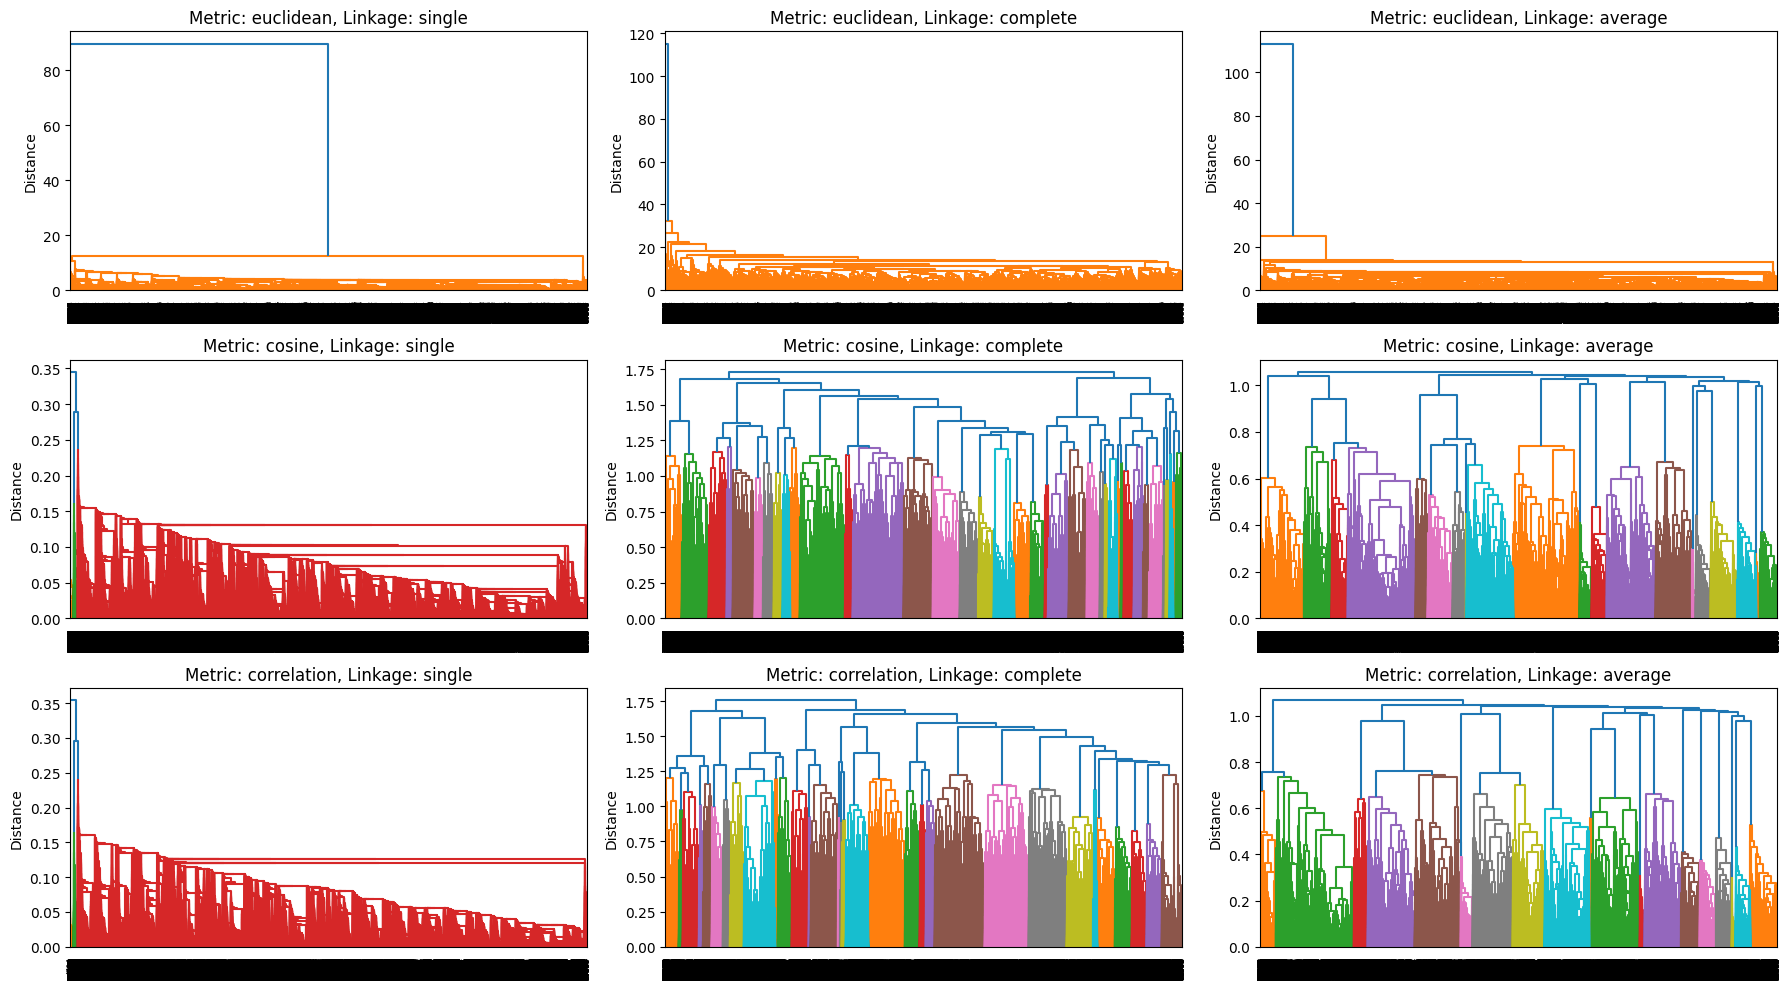

In [76]:
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import linkage

linkage_methods = ['single', 'complete', 'average']
metrics = ['euclidean', 'cosine', 'correlation']

fig, axs = plt.subplots(len(metrics), len(linkage_methods), figsize=(18, 10))

# Iterate through each metric
for i, metric in enumerate(metrics):
    # Iterate through each connection method
    for j, linkage_method in enumerate(linkage_methods):
        # Carry out hierarchical grouping
        Z = linkage(bank_scaled, method=linkage_method, metric=metric)

        # Plot dendrogram
        axs[i, j].set_title(f'Metric: {metric}, Linkage: {linkage_method}')
        dendrogram(Z, ax=axs[i, j])
        axs[i, j].set_ylabel('Distance')

plt.tight_layout()
plt.show()

Aqui criamos uma subplot, para nos mostrar os 9 diferentes tipos de *Hierarchical Cluster*, com as diferentes *métricas* e *método linkage*.

Olhando para o gráfico temos de ter em conta onde iremos fazer o corte para descobrir o número ideal de clusters. Para isso vamos fazer o corte onde os traços são melhor separados e onde conseguimos criar o menor número de grupos possiveis.

Posto isto, vamos fazer uma análise a cada um dos Hierarchical:

- ***Metric: Euclidean, Linkage: Single***

    - A maioria dos pontos estão agrupados num cluster grande com uma distância pequena entre si.

- ***Metric: Euclidean, Linkage: Complete***

    - Os dados são divididos em vários grupos, onde a distância máxima de cada grupo é minimizada.

- ***Metric: Euclidean, Linkage: Average***

    - Produz uma distribuição de clusters mais equilibrada em termos de distâncias.

- ***Metric: Cosine, Linkage, Single***

    - Semelhante à euclidiana com ligação simples, com um grande cluster com alguns outliers.

- ***Metric: Cosine, Linkage: Complete***

    - Os clusters são bem definidos e as distâncias internas são relativamente baixas, indicando alta similaridade dentro dos clusters.

- ***Metric: Cosine, Linkage: Average***

    - Distribuição equilibrada de clusters, semelhante à ligação média com distância euclidiana.

- ***Metric: Correlation, Linkage: Single***

    - Semelhante aos outros métodos com ligações simples, com muitos pequenos clusters e um grande cluster.

- ***Metric: Correlation, Linkage: Complete***

    - Agrupamente mais detalhado com uma boa separação entre os clusters.

- ***Metric: Correlation, Linkage: Average***

    - Equilibra as features dos métodos de ligação simples e completa.

Posto isto, podemos concluir que, o que nos favorece melhor será o ***Metric: Correlation, Linkage: Complete***, devido ao seu agrupamento mais detalhado e boa separação de clusters.

Podemos fazer o corte, por volta dos 1.70, sendo que é o sítio onde minimiza o número de clusters, e que existe uma boa separação. Fomos á busca dos dois clusters, sendo que como também temos conhecimento do dataset, e que o objetivo é agrupar os clientes que efetuaram um depósito e os que não o efetuaram, escolhemos 2 clusters.

In [76]:
from sklearn.cluster import AgglomerativeClustering

model = AgglomerativeClustering(n_clusters=2,
                                linkage='complete',
                                metric='correlation')
model.fit(bank_scaled)

labels = model.labels_

pd.crosstab(labels, bank['y'], rownames=['clusters'])

y,0,1
clusters,,
0,23871,4747
1,9291,37


Pela nossa crosstab, reparamos que o nosso cluster não ficou assim tão bem agrupado quanto isso, vemos que temos mais valores reais '0' presentes no cluster 1, do que os próprios valores '1'. Conseguimos concluir, posto isto, que o algoritmo *K-Means*, tende a criar clusters mais organizados e mais 'limpos'.

# ***Supervised Learning***

Em *Supervised Learning*, o modelo é treinado num labeled dataset, em que os dados de entrada são emparelhados com os output labels (rótulos de saída) correspondentes. O objetivo é aprender um mapeamento das entradas para as saídas, permitindo ao algoritmo fazer previsões sobre dados novos e não vistos.

Como estamos a tratar de um dataset, em que o target é binário, estamos perante um problema de **Calissificação Binária**.

## *Split our target from the dataset*

In [77]:
x = bank.iloc[:, 0:27]
y = bank.iloc[:,27]

## *Split Data*

In [78]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=18, stratify=y)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((28459, 27), (9487, 27), (28459,), (9487,))

Aqui inicialmente, devidimos o nosso conjunto de dados em x e y, para que o nosso target (y) fique afastado das nossas features (x).

De seguida, dividimos o nosso dataset completo, ou seja x e y, em treino e teste. Usamos 25% dos dados para teste, para termos muitos dados na aprendizagem e não tantos para o teste, fazendo com que não tenhamos também poucos dados no teste, para que consigamos perceber também o quão bem ou mal o(s) nosso(s) modelo(s) está(ão) a fazer as previsões.

## *Scaling*

variáveis numéricas: age, balance_log, education, day, month_sin, month_cos, campaign, pdays, previous

In [79]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

num_var = ['age', 'balance_log', 'education', 'day', 'month_sin', 'month_cos', 'campaign', 'pdays', 'previous']

x_train_scaled = x_train.copy()
x_train_scaled[num_var] = scaler.fit_transform(x_train_scaled[num_var])

x_test_scaled = x_test.copy()
x_test_scaled[num_var] = scaler.transform(x_test_scaled[num_var])

x_train = x_train_scaled
x_test = x_test_scaled

x_train.shape, x_test.shape

((28459, 27), (9487, 27))

Como vimos anteriormente, o scaler mais apropriado, é o *Standard Scaler*.

Porém, aqui fizemos de maneira diferente.

Primeiramente, dividimos os nossos dados em treino e teste, e agora utilizamos o scaler, em que treinamos primeiro o scaler para os dados de treino e aplicamos esse scaler treinado para transformar os dados de teste. Fizemos isto, para garantir que os dados de treino não fossem influenciados pelos dados de teste, evitando qualquer fuga de informações.

Após escalar o nosso próximo passo seria ***Feature Selection***, mas como não temos muitas features para reduzirmos a dimensionalidade, não o iremos fazer. Posto isto, iremos passar para a fase de criação dos modelos de previsão.

## *Predictive Models*

### *Logistic Regression*

Para este passo, iremos começar com um modelo mais simples e mais interpretável, *Regressão Logística*, que é um modelo linear generalizado. Este modelo utiliza funções estatísticas e matemáticas para ver a probabilidade de um determidado conjunto de recetores (Input) ser uma determinada classe. 

In [80]:
from sklearn.linear_model import LogisticRegression

# Create the model
model = LogisticRegression(C=1e5, random_state= 18)

# Fit the training data into the model
model.fit(x_train, y_train)

# Make some predictions
y_pred = model.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

#### *Evaluate*

In [81]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)

print('Accuracy: ', accuracy)

Accuracy:  0.8726678612838621


In [82]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)

array([[8265,   26],
       [1182,   14]], dtype=int64)

Pela accuracy, vemos que o nosso modelo aparenta fazer umas boas previsões. Porém ao olharmos para a matriz de confusão, vemos que o modelo não está nada bom, e parece estar a fazer overfitting. Vemos que o modelo está só a fazer previsões para a classe 0 e quase nenhuma para a classe 1.

### *Dealing with Imbalanced Data*

In [83]:
num_0 = np.sum((bank['y'] == 0))
proportion_0 = num_0 / len(bank)
num_1 = np.sum((bank['y'] == 1))
proportion_1 = num_1 / len(bank)

print("Number of 0:", num_0, ", with ", proportion_0 * 100, "%")
print("Number of 1:", num_1, ", with ", proportion_1 * 100, "%")

Number of 0: 33162 , with  87.39261055183682 %
Number of 1: 4784 , with  12.607389448163179 %


Este código mostra-nos que a nossa variável target, está desbalanceada, visto que quase 90% da variável target pertence á classe 0 e apenas 10% dos dados pertence á classe 1.

Tratar do balanceamento dos Dados é importante, pois não queremos que o nosso dataset tenha demasiados valores para uma classe e para outra poucos. Isto pode ser um problema, pois quando vamos a treinar e testar modelos, vemos que a nossa accuracy vai ser muito alta (indicando um bom modelo de previsão), quando na verdade o nosso modelo é fraco e só prevê uma única classe, isto acontece porque o modelo treinou tanto uma classe que não vai conseguir prever a outra, fazendo com que se entre no overfitting, que é quando um modelo se ajusta demasiado aos dados, e não generaliza.

Para começar, iremos utilizar uma técnica chamada ***Class Weighting***, esta técnica atribuímos um peso maior para a classe minoritária, fazendo com o modelo dê mais enfase á classe com menos valores.

In [84]:
class_weight_0 = 1 / proportion_0
class_weight_1 = 1 / proportion_1

print("Class Weight 0:", class_weight_0)
print("Class Weight 1:", class_weight_1)
# Creating the model with the Class Weights
class_weights = {0: class_weight_0, 1: class_weight_1} # Giving the weight to each class

Class Weight 0: 1.1442615041312345
Class Weight 1: 7.931856187290971


Aqui vemos os melhores valores do peso para a técnica **Class Weight**.

Iremos abordar também mais algumas técnicas, e depois ver a melhor para cada modelo.

Primeiramente, iremos abordar o ***Oversampling***.

In [85]:
# --Oversampling--
from imblearn.over_sampling import RandomOverSampler

# Applying Oversampling
oversmapler = RandomOverSampler(sampling_strategy='minority')
x_train_over, y_train_over = oversmapler.fit_resample(x_train, y_train)

Aqui utilizamos a técnica de **Oversampling**, que é uma técnica onde se aumenta o número de instâncias da classe minoritária.

De seguida e por última técnica, iremos abordar o ***Undersampling***.

In [86]:
# --Undersampling--
from imblearn.under_sampling import RandomUnderSampler

# Applying Undersampling
undersampler = RandomUnderSampler(sampling_strategy='majority')
x_train_under, y_train_under = undersampler.fit_resample(x_train, y_train)

Aqui utilizamos a técnica de **Undersampling**, que é uma técnica onde se diminui o número de instâncias da classe maioritária.

Após a criação das técnicas, vamos voltar á criação dos modelos preditivos, mas agora usando cada técnica, e ver o melhor erro.

### Logistic Regression

In [87]:
# --Class Weight Technique--
# Creating and training the model
model = LogisticRegression(class_weight=class_weights)
model.fit(x_train, y_train)

# Make Predictions
y_pred = model.predict(x_test)

# --Oversampling Technique--
# Create and Train our model
model_over = LogisticRegression()
model_over.fit(x_train_over, y_train_over)

# Make Predictions
y_pred_over = model_over.predict(x_test)

# --Undersampling Technique--
# Create and Train our Model
model_under = LogisticRegression()
model_under.fit(x_train_under, y_train_under)

# Make Predictions
y_pred_under = model_under.predict(x_test)

##### *Evaluate* each created model

In [88]:
accuracy = accuracy_score(y_test, y_pred)
accuracy_over = accuracy_score(y_test, y_pred_over)
accuracy_under = accuracy_score(y_test, y_pred_under)

print("Accuracy for Class Weight:", accuracy)
print("Accuracy for Undersampling:", accuracy_under)
print("Accuracy for Oversampling:", accuracy_over)

print("--Confusion Matrix for Class Weight--\n", confusion_matrix(y_test, y_pred))
print("--Confusion Matrix for Oversampling--\n", confusion_matrix(y_test, y_pred_over))
print("--Confusion Matrix for Undersampling--\n", confusion_matrix(y_test, y_pred_under))


Accuracy for Class Weight: 0.6606935806893643
Accuracy for Undersampling: 0.6644882470749447
Accuracy for Oversampling: 0.6595340992937704
--Confusion Matrix for Class Weight--
 [[5481 2810]
 [ 409  787]]
--Confusion Matrix for Oversampling--
 [[5476 2815]
 [ 415  781]]
--Confusion Matrix for Undersampling--
 [[5522 2769]
 [ 414  782]]


Após termos tratado dos dados balanceados usando o ***Class Weight***, vemos pela matriz de confusão que o modelo está a conseguir fazer previsões tanto para a classe 0 como para a classe 1, o que nos indica um melhoramento nos dados, porém vemos que a accuracy teve uma descida drástica, concluindo que este modelo não é assim tão bom quanto pensavamos.

Por estas duas matrizes de confusão, para **Undersampling** e **Oversampling**, vemos que o nosso modelo tem melhores previsões que usar o **class weight**, porém ainda são um bocado fracas.

Iremos utilizar outro modelo de previsão, **Decision Tree**, e ver se o erro melhora.

### *Decision Tree*

As *Árvores de Decisão*, **Decision Trees**, é um algoritmo um bocado mais complexo que a *Regressão Logistica*, e menos interpretável. Matematicamente, uma Árvore de Decisão pode ser definida como um gráfico acíclico direcionado, constituido por *Nós*, *Arestas*, *Nó Raiz*, *Nós de Decisão* e *Nós de Folha*.

E como também já vimos antes que os estamos perante dados desbalanceados, vamos iniciar este processo, já com cada técnica.

In [89]:
from sklearn.tree import DecisionTreeClassifier

Para encontrar os melhores parâmetros de uma árvore de decisão, iremos utilizar o ***Grid Search***, que é uma abordagem sistemática para testar diferentes combinações de hiperparâmetros e encontrar aquela que produz o melhor desempenho de acordo com uma métrica específica.

In [90]:
from sklearn.model_selection import GridSearchCV
from imblearn.pipeline import Pipeline

# Define the parameters to be tested
param_grid = {
    'classifier__max_depth': [None, 10, 20, 30],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]
}

pipeline = Pipeline([
    ('oversampler', RandomOverSampler(random_state=18)),
    ('undersampler', RandomUnderSampler(random_state=18)),
    ('classifier', DecisionTreeClassifier(random_state=18))
])

grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)

print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'classifier__max_depth': None, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2}


Nesta célula, utilizamos o *Grid Search*, para encontrar os melhores parâmetros para uma árvore de Decisão.

Vemos que:

- A melhor *max_depth* é None;
- O melhor *min_samples_leaf* é 1;
- O melhor *min_samples_split* é 2.

In [91]:
# --Class Weights technique--
# Creating and train our model
model = DecisionTreeClassifier(max_depth=None, min_samples_leaf=1, min_samples_split=2, class_weight=class_weights, random_state=18)
model.fit(x_train, y_train)

# Make Predictions
y_pred = model.predict(x_test)

# -- Oversampling technique--
# Create and train our model
model_over = DecisionTreeClassifier(max_depth=None, min_samples_leaf=1, min_samples_split=2, random_state=18)
model.fit(x_train_over, y_train_over)

# Make predictions
y_pred_over = model.predict(x_test)

# --Undersampling technique--
# Create and train our model
model_under = DecisionTreeClassifier(max_depth=None, min_samples_leaf=1, min_samples_split=2, random_state=18)
model_under.fit(x_train_under, y_train_under)

# Make predictions
y_pred_under = model_under.predict(x_test)

#### *Evaluate*

In [92]:
accuracy = accuracy_score(y_test, y_pred)
accuracy_over = accuracy_score(y_test, y_pred_over)
accuracy_under = accuracy_score(y_test, y_pred_under)

print("Accuracy for Class Weights Technique:", accuracy)
print("Accuracy for Oversampling Technique:", accuracy_over)
print("Accuracy for Undersampling Technique:", accuracy_under)

print("--Confusion Matrix for Class Weight--\n", confusion_matrix(y_test, y_pred))
print("--Confusion Matrix for Oversampling--\n", confusion_matrix(y_test, y_pred_over))
print("--Confusion Matrix for Undersampling--\n", confusion_matrix(y_test, y_pred_under))

Accuracy for Class Weights Technique: 0.8309265310424792
Accuracy for Oversampling Technique: 0.8303994940444819
Accuracy for Undersampling Technique: 0.6224306946347634
--Confusion Matrix for Class Weight--
 [[7492  799]
 [ 805  391]]
--Confusion Matrix for Oversampling--
 [[7525  766]
 [ 843  353]]
--Confusion Matrix for Undersampling--
 [[5171 3120]
 [ 462  734]]


Pelos resultados obtidos, vemos que as árvores de Decisão precisam do *Undersampling*, porque é o que melhor consegue encontrar um equilibrio entre as duas classe de previsão. Porém também é o que tem pior erro. Podemos concluir que o melhor será utilizar para este algoritmo, *Decision Tree*, o Undersampling, apesar de mostrar uma accuracy significativamente mais baixo, consegue buscar melhor as duas classes que as outras duas técnicas.

### *Random Forests*

Para encontrar os melhores parâmetros para uma *Random Forest*, podemos utilizar a mesma abordagem que utilizamos nas *Decision Trees*.

In [93]:
from sklearn.ensemble import RandomForestClassifier

In [94]:
from sklearn.model_selection import GridSearchCV
from imblearn.pipeline import Pipeline

# Define the parameters to be tested
param_grid = {
    'classifier__max_depth': [None, 10, 20, 30],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]
}

pipeline = Pipeline([
    ('oversampler', RandomOverSampler(random_state=18)),
    ('undersampler', RandomUnderSampler(random_state=18)),
    ('classifier', RandomForestClassifier(random_state=18))
])

grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)

print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'classifier__max_depth': None, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2}


Neste código utilizamos novamente o *Grid Search*, para conseguirmos encontrar os melhores parâmetros para uma random forest.

E vemos que:
- Max depth é None;
- Minimum Samples Leaf é 1;
- Minimum Samples Split é 2. 

In [95]:
# --Class Weight Technique--
# Create and traing the model
model = RandomForestClassifier(max_depth=None, min_samples_leaf=1, min_samples_split=2, class_weight=class_weights, random_state=18)
model.fit(x_train, y_train)

# Make predictions
y_pred = model.predict(x_test)

# --Oversampling Technique--
model_over = RandomForestClassifier(max_depth=None, min_samples_leaf=1, min_samples_split=2, random_state=18)
model_over.fit(x_train_over, y_train_over)

# Make predictions
y_pred_over = model_over.predict(x_test)

# --Undersampling Technique--
model_under = RandomForestClassifier(max_depth=None, min_samples_leaf=1, min_samples_split=2, random_state=18)
model_under.fit(x_train_under, y_train_under)

# Make Predicitions
y_pred_under = model_under.predict(x_test)

#### Evaluate

In [96]:
accuracy = accuracy_score(y_test, y_pred)
accuracy_over = accuracy_score(y_test, y_pred_over)
accuracy_under = accuracy_score(y_test, y_pred_under)

print("Accuracy for Class Weights Technique:", accuracy)
print("Accuracy for Oversampling Technique:", accuracy_over)
print("Accuracy for Undersampling Technique:", accuracy_under)

print("--Confusion Matrix for Class Weight--\n", confusion_matrix(y_test, y_pred))
print("--Confusion Matrix for Oversampling--\n", confusion_matrix(y_test, y_pred_over))
print("--Confusion Matrix for Undersampling--\n", confusion_matrix(y_test, y_pred_under))

Accuracy for Class Weights Technique: 0.8772003794666385
Accuracy for Oversampling Technique: 0.8678191209022873
Accuracy for Undersampling Technique: 0.7531358701380837
--Confusion Matrix for Class Weight--
 [[8133  158]
 [1007  189]]
--Confusion Matrix for Oversampling--
 [[7859  432]
 [ 822  374]]
--Confusion Matrix for Undersampling--
 [[6374 1917]
 [ 425  771]]


Pelos resultados obtidos, vemos que a melhor técnica será *Undersampling*, pois apesar de apresentar um erro mais baixo, vemos que é o que prevê melhor cada classe. Podemos concluir também, que para já que a Random Forest, com Undersampling, é o melhor modelo que criamos.

### SVM

Os SVMs são modelos mais complexos que as random forests, porém são modelos com boa interpretabilidade. Iremos utilizar os SVMs para cada técnica de desbalanceamento e ver o erro.

In [97]:
from sklearn.svm import SVC